# Project 4: Examining Influential Facotrs on Poverty Status
## Introduction, Data Cleaning, and Exploratory Data Analysis

## Table of Contents:
- [Problem Statement](#problem_statement)
- [Data Cleaning](#data_cleaning)
- [Data Dictionary](#data_dictionary)
- [Exploratory Data Analysis](#eda)
- [Data Visualization](#dv)

## Problem Statement<a id='problem_statement'></a>
---

This project aims to develop strategies for reducing economic disparities in the United States by using data analysis on The Current Population Survey (CPS) to identify groups of people who are at risk of poverty or financial struggles. We will use clustering (KMeans, DBScan, KModes) and inferential classification techniques (Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier) to group people based on their education, healthcare access, and other factors in order to determine how specific factors influence Supplemental Poverty Measure (SPM) poverty likelihood. The effectiveness of our classification models will be  evaluated on balanced accuracy and F1 score. The insights we gain will help non-profits, policymakers, and government agencies develop targeted interventions and policies to promote economic equity and help those who need it most.

### Background Research

**CPS**

According to the Bureau of the Census, 
> "The CPS is the source of the official Government statistics on employment and unemployment. The CPS has been conducted monthly for over 50 years. Currently, we interview about 54,000 households monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. Each household is interviewed once a month for four consecutive months one year, and again for the corresponding time period a year later." <sup>1</sup>

Employment, demographic, health, and education information collected provide important information on the nation's status than can impact the planning and evaluation of many relevant agencies. 

**SPM**

According to the Congressional Research Service,
> "Under the SPM, the measure of need is based on recent spending data from the Consumer Expenditure Survey; namely, a percentage of median family spending on food, clothing, shelter, and utilities (plus an extra 20% for miscellaneous expenses such as personal care products), as opposed to having been computed once and indexed forward for inflation (as is done for the official measure). For the resources necessary to meet that level of need, the SPM uses after-tax income (which includes tax credits), estimates the value of certain noncash benefits (such as food assistance), and subtracts some expenditures (such as work-related expenses, child care expenses, and medical expenses paid out-of-pocket) that families cannot
use toward the categories of basic needs that are used to define the SPM poverty level. This approach is intended to better reflect the economic choices families currently face, and to better reflect the effects of government programs on the low-income population, than does the official measure. " <sup>2</sup>

If the resources are less than the measure of need, the family or unrelated individual is considered to be in poverty; if resources are greater than or equal to the measure of need, the family or individual is classified as not being in poverty.<sup>2</sup>

Additionally, 

> "The SPM includes adjustments to reflect geographic variations in housing costs, and the estimated effects of taxes and in-kind benefits (such as housing, energy, and food assistance) on poverty, while the official measure does not. The SPM also takes a more expansive approach than the official measure in recognizing relationships among household members for the purpose of identifying how those members share costs and pool resources. Furthermore, while one-time payments such as economic stimuli are not considered as part of the official definition of income, these payments are considered as resources in the SPM. Because some types of tax credits and noncash benefits provide financial help to families and individuals in poverty, the SPM may be of interest to policymakers, particularly in light of the economic stimulus payments and tax credits
provided in 2021 in response to the COVID-19 pandemic."<sup>2</sup>

In 2021<sup>2</sup>,
> * "the overall poverty rate under the SPM fell 1.4 percentage points (to 7.8% from 9.2% in 2020),
> * nearly 4.5 million fewer people lived in poverty (25.6 million, down from 30.0 million in 2020) according
to the SPM,
> * SPM poverty rate declines were widespread among demographic groups, and
> * the SPM child poverty rate reached the lowest level ever recorded, having fallen to 5.2% from 9.7% in
2020; this reflects the effects of policies targeted toward children and families with children."

Poverty rate declines were widespread among demographic groups, ostensibly due to noncash assistance and refundable tax credits provided in response to the COVID-19 pandemic.<sup>2</sup>

1. [CPS Overview](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar22.pdf)
1. [Congressional Research Service](https://crsreports.congress.gov/product/pdf/R/R47354#:~:text=This%20remained%20true%20in%202021,couple%20families%20(Figure%202).)

### Data Used

[`pppub22.csv`](../data/pppub22.csv): Current Population Survey, 2022 Annual Social and Economic (ASEC) Supplement conducted by the Bureau of the Census for the Bureau of Labor Statistics. Dataset contains 152,732 observations.<sup>3</sup>

> * The universe is the civilian noninstitutional population of the United States living in housing units and members of the Armed Forces living off post or living with their families on post, as long as at least one civilian adult lives in the same household. 
> * The sample is located in approximately 826 sample areas comprising 1,328 counties and independent cities with coverage in every State and in the District of Columbia. In all, some 70,000 housing units or other living quarters
are assigned for interview each month; about 50,000 of them containing approximately 100,000 persons 15 years old and over are interviewed.
> * Also included are demographic data for approximately 22,000 children 0-14 years old and 400 Armed Forces members living withcivilians either on or off base within these households.
> * This ASEC Supplement provides the usual monthly labor force data, but in addition, provides supplemental data on work experience, income, noncash benefits, and migration. Comprehensive work experience information is given on the employment status,occupation, and industry of persons 15 years old and over. 

3. [CPS Overview](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar22.pdf)

## Data Cleaning<a id='data_cleaning'></a>
---

In [5]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)

In [53]:
#Inspect data

#need git lsf to read from data folder
#df=pd.read_csv('../data/pppub22.csv')

#dataset repository link
df = pd.read_csv('https://media.githubusercontent.com/media/Rpierre98/DSI-320-Group-Project/main/data/pppub22.csv')
df.head()

,PERIDNUM,PH_SEQ,P_SEQ,A_LINENO,PF_SEQ,PHF_SEQ,OED_TYP1,OED_TYP2,OED_TYP3,PERRP,PXRRP,PXMARITL,PXRACE1,PEHSPNON,PXHSPNON,PEAFEVER,PXAFEVER,PEAFWHN1,PXAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXSPOUSE,PENATVTY,PXNATVTY,PEMNTVTY,PXMNTVTY,PEFNTVTY,PXFNTVTY,PEINUSYR,PXINUSYR,PEPAR1,PXPAR1,PEPAR2,PXPAR2,PEPAR1TYP,PXPAR1TYP,PEPAR2TYP,PXPAR2TYP,PRDASIAN,PRDTHSP,PRDTRACE,PRPERTYP,PRCITFLG,PRCITSHP,PECOHAB,PXCOHAB,PEABSRSN,PEHRUSLT,PEMLR,PRDISC,PRPTREA,PRUNTYPE,PRWKSTAT,PEIO1COW,PRCOW1,PRERELG,PRWERNAL,PRHERNAL,PRNLFSCH,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,PRDISFLG,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,A_AGE,A_SEX,A_DTIND,A_HRSPAY,A_PAYABS,A_WANTJB,A_HRLYWK,A_ENRLW,A_EXPLF,A_MJIND,A_UNMEM,A_MJOCC,A_DTOCC,A_UNCOV,A_HSCOL,A_FTPT,A_WKSCH,A_FNLWGT,A_ERNLWT,A_FAMREL,A_FAMNUM,AXAGE,AXSEX,AXLFSR,AXHRS,AXWHYABS,AXPAYABS,AXCLSWKR,AXNLFLJ,AXUSLHRS,AXUNMEM,AXUNCOV,AXENRLW,AXHSCOL,AXFTPT,AXHGA,AXHRLYWK,A_USLHRS,A_FAMTYP,A_GRSWK,A_WKSLK,A_SPOUSE,A_MARITL,A_HGA,A_HRS1,P_STAT,A_USLFT,A_CIVLF,A_FTLF,A_UNTYPE,A_CLSWKR,A_EXPRRP,A_WKSTAT,A_LFSR,A_WHYABS,A_PFREL,A_WHENLJ,A_NLFLJ,MARSUPWT,ACTC_CRD,AGE1,AGI,ANN_VAL,ANN_YN,CAID,CAP_VAL,CAP_YN,CHAMPVA,CHCARE_YN,CHELSEW_YN,CHSP_VAL,CHSP_YN,CLWK,COV,COV_CYR,COV_MULT_CYR,CSP_VAL,CSP_YN,CTC_CRD,DBTN_VAL,DEPDIR,DEPGRP,DEPMIL,DEPMRK,DEPMRKS,DEPMRKUN,DEPNONM,DEPPRIV,DIR,DIRFTYP,DIRFTYP2,DIRLIN1,DIROUT,DIS_CS,DIS_HP,DIS_SC1,DIS_SC2,DIS_VAL1,DIS_VAL2,DIS_YN,DIV_VAL,DIV_YN,DSAB_VAL,DST_SC1,DST_SC2,DST_SC1_YNG,DST_SC2_YNG,DST_VAL1,DST_VAL2,DST_VAL1_YNG,DST_VAL2_YNG,DST_YN,DST_YN_YNG,EARNER,ED_VAL,ED_YN,EIP_CRD,EIT_CRED,ERN_OTR,ERN_SRCE,ERN_VAL,ERN_YN,ESICOULD,ESIELIG1,ESIELIG2,ESIELIG3,ESIELIG4,ESIELIG5,ESIELIG6,ESIOFFER,ESITAKE1,ESITAKE2,ESITAKE3,ESITAKE4,ESITAKE5,ESITAKE6,ESITAKE7,ESITAKE8,FAMREL,FEDTAX_AC,FEDTAX_BC,FICA,FIN_VAL,FIN_YN,FRMOTR,FRM_VAL,FRSE_VAL,FRSE_YN,GRP,GRPFTYP,GRPFTYP2,GRPLIN1,GRPOUT,HEA,HHDFMX,HHDREL,HIPAID,HRCHECK,HRSWK,IHSFLG,INDUSTRY,INT_VAL,INT_YN,I_ANNVAL,I_ANNYN,I_CAID,I_CAPVAL,I_CAPYN,I_CHAMPVA,I_CHCAREYN,I_CHELSEWYN,I_CHSPVAL,I_CHSPYN,I_CSPVAL,I_CSPYN,I_DEPDIR,I_DEPGRP,I_DEPMIL,I_DEPMRK,I_DEPMRKS,I_DEPMRKUN,I_DEPNONM,I_DEPPRIV,I_DIR,I_DIROUT,I_DISCS,I_DISHP,I_DISSC1,I_DISSC2,I_DISYN,I_DIVVAL,I_DIVYN,I_DSTSC,I_DSTSCCOMP,I_DSTVAL1COMP,I_DSTVAL2COMP,I_DSTYNCOMP,I_EDTYP,I_EDYN,I_ERNSRC,I_ERNVAL,I_ERNYN,I_ESICOULD,I_ESIELIG1,I_ESIELIG2,I_ESIELIG3,I_ESIELIG4,I_ESIELIG5,I_ESIELIG6,I_ESIOFFER,I_ESITAKE1,I_ESITAKE2,I_ESITAKE3,I_ESITAKE4,I_ESITAKE5,I_ESITAKE6,I_ESITAKE7,I_ESITAKE8,I_FINVAL,I_FINYN,I_FRMVAL,I_FRMYN,I_GRP,I_GRPOUT,I_HEA,I_HIPAID,I_HRCHK,I_HRSWK,I_IHSFLG,I_INDUS,I_INTVAL,I_INTYN,I_LJCW,I_LKSTR,I_LKWEEK,I_LOSEWK,I_MCAID,I_MCARE,I_MCPREM,I_MIG1,I_MIG2,I_MIG3,I_MIL,I_MILOUT,I_MOOP,I_MOOP2,I_MRK,I_MRKOUT,I_MRKS,I_MRKSOUT,I_MRKUN,I_MRKUNOUT,I_NOEMP,I_NONM,I_NONMOUT,I_NOW_CAID,I_NOW_CHAMPVA,I_NOW_DEPDIR,I_NOW_DEPGRP,I_NOW_DEPMIL,I_NOW_DEPMRK,I_NOW_DEPMRKS,I_NOW_DEPMRKUN,I_NOW_DEPNONM,I_NOW_DEPPRIV,I_NOW_DIR,I_NOW_DIROUT,I_NOW_GRP,I_NOW_GRPOUT,I_NOW_HIPAID,I_NOW_IHSFLG,I_NOW_MCAID,I_NOW_MCARE,I_NOW_MIL,I_NOW_MILOUT,I_NOW_MRK,I_NOW_MRKOUT,I_NOW_MRKS,I_NOW_MRKSOUT,I_NOW_MRKUN,I_NOW_MRKUNOUT,I_NOW_NONM,I_NOW_NONMOUT,I_NOW_OTHMT,I_NOW_OUTDIR,I_NOW_OUTGRP,I_NOW_OUTMIL,I_NOW_OUTMRK,I_NOW_OUTMRKS,I_NOW_OUTMRKUN,I_NOW_OUTNONM,I_NOW_OUTPRIV,I_NOW_OWNDIR,I_NOW_OWNGRP,I_NOW_OWNMIL,I_NOW_OWNMRK,I_NOW_OWNMRKS,I_NOW_OWNMRKUN,I_NOW_OWNNONM,I_NOW_OWNPRIV,I_NOW_PCHIP,I_NOW_PRIV,I_NOW_PUB,I_NOW_VACARE,I_NWLKWK,I_NWLOOK,I_NXTRES,I_OCCUP,I_OEDVAL,I_OIVAL,I_OTHMT,I_OUTDIR,I_OUTGRP,I_OUTMIL,I_OUTMRK,I_OUTMRKS,I_OUTMRKUN,I_OUTNONM,I_OUTPRIV,I_OWNDIR,I_OWNGRP,I_OWNMIL,I_OWNMRK,I_OWNMRKS,I_OWNMRKUN,I_OWNNONM,I_OWNPRIV,I_PAWMO,I_PAWTYP,I_PAWVAL,I_PAWYN,I_PCHIP,I_PECOULD,I_PENINC,I_PENPLA,I_PENSC1,I_PENSC2,I_PENVAL1,I_PENVAL2,I_PENYN,I_PEOFFER,I_PEWNELIG1,I_PEWNELIG2,I_PEWNELIG3,I_PEWNELIG4,I_PEWNELIG5,I_PEWNELIG6,I_PEWNTAKE1,I_PEWNTAKE2,I_PEWNTAKE3,I_PEWNTAKE4,I_PEWNTAKE5,I_PEWNTAKE6,I_PEWNTAKE7,I_PEWNTAKE8,I_PHIPVAL,I_PHIPVAL2,I_PHMEMP,I_PMEDVAL

In [54]:
#Check shape
df.shape

(152732, 832)

In [55]:
#choose features to use in EDA and modeling
columns=['A_AGE','MIG_ST','A_FAMREL','PMED_VAL','POTC_VAL','A_MJOCC','A_HGA','A_MARITL',
         'A_SEX','HHDREL','PEAFEVER','PECERT3','PEDISDRS','PEDISEAR','PEDISEYE','PEDISOUT',
         'PEDISPHY','PEDISREM','PEHSPNON','PEINUSYR','PRCITSHP','PRDISFLG','PRDTRACE',
         'A_MJIND','PEMLR','PRWKSTAT','LJCW','WEIND','RSNNOTW','WEWKRS','WKSWORK',
         'ERN_SRCE','ERN_VAL','ERN_OTR','WSAL_VAL','DIS_HP','DIS_SC1','DIS_SC2','DSAB_VAL',
         'FIN_YN','OI_OFF','PAW_MON','PAW_TYP','WICYN','CHSP_VAL','AGI','FILESTAT','COV',
         'PUB_CYR','PRIV_CYR','SPM_POOR', 'PERLIS']

df=df[columns]

In [56]:
#rename columns to be more descriptive
df = df.rename(columns=
               {'A_AGE': 'AGE', 'MIG_ST': 'STATE','A_FAMREL':'FAM_RELATIONSHIP',
                'PMED_VAL':'OUT_POCKET_NONPREM','POTC_VAL':'OUT_POCKET_OC','A_MJOCC':'OCCUPATION',
                'A_HGA':'EDU_LVL','A_MARITL':'MARITAL','A_SEX':'SEX','HHDREL':'HOUSEHOLD_SUMMARY',
                'PEAFEVER':'MILITARY','PECERT3':'CERT_REQ','PEDISDRS':'TROUB_BATHE','PEDISEAR':'TROUB_HEAR',
                'PEDISEYE':'TROUB_SEE','PEDISOUT':'TROUB_ALONE','PEDISPHY':'TROUB_WALK','PEDISREM':'TROUB_CONC',
                'PEHSPNON':'HISPANIC','PEINUSYR':'IMMIGR_YR','PRCITSHP':'CITIZENSHIP','PRDISFLG':'DISABLED',
                'PRDTRACE':'RACE','A_MJIND':'WORK_INDUSTRY','PEMLR':'LABOR_STATUS','PRWKSTAT':'WRK_STATUS',
                'LJCW':'WRK_CLASS_LONGEST','WEIND':'LONGEST_IND','RSNNOTW':'NO_WRK_RSN','WEWKRS':'FT_PT',
                'WKSWORK':'WEEKS_WRK','ERN_SRCE':'EARN_SOURCE','ERN_VAL':'GROSS_PAY','ERN_OTR':'ERN_OTR',
                'WSAL_VAL':'EARN_TOTAL','DIS_HP':'WORK_DIS','DIS_SC1':'DIS_INC','DIS_SC2':'OTH_DIS_INC',
                'DSAB_VAL':'TOTAL_DIS_INC','FIN_YN':'FIN_ASSIST','OI_OFF':'OTH_INC','PAW_MON':'TIME_ASSIST',
                'PAW_TYP':'CASH_ASSIST','WICYN':'WIC','CHSP_VAL':'CHLD_SUP','AGI':'ADJ_GROSS_INC',
                'FILESTAT':'TAX_FILE_STAT','COV':'HEALTH_INS','PUB_CYR':'PUB_INS','PRIV_CYR':'PRIV_INS',
                'SPM_POOR': 'POV_STS', 'PERLIS' : 'POV_LVL'})

In [57]:
#decode nominal categorical variables for future use in modeling
df=df.replace({'STATE' : {0 : 'nonmover', 1 : 'Alabama', 2 : 'Alaska', 4 :' Arizona', 5 : 'Arkansas',
                          6 : 'California', 8 : 'Colorado', 9 : 'Connecticut', 10 : 'Delaware',
                          11 : 'District of Columbia', 12 : 'Florida', 13 : 'Georgia', 15 : 'Hawaii',
                          16 : 'Idaho', 17 : 'Illinois', 18 : 'Indiana', 19 : 'Iowa', 20 : 'Kansas',
                          21 : 'Kentucky', 22 : 'Louisiana', 23 : 'Maine', 24 : 'Maryland',
                          25 : 'Massachusetts', 26 : 'Michigan', 27 : 'Minnesota', 28 : 'Mississippi',
                          29 : 'Missouri', 30 : 'Montana', 31 : 'Nebraska', 32 : 'Nevada', 33 : 'New Hampshire',
                          34 : 'New Jersey', 35 : 'New Mexico', 36 : 'New York', 37 : 'North Carolina',
                          38 : 'North Dakota', 39 : 'Ohio', 40 : 'Oklahoma', 41 : 'Oregon', 42 : 'Pennsylvania',
                          44 : 'Rhode Island', 45 : 'South Carolina', 46 : 'South Dakota', 47 : 'Tennessee',
                          48 : 'Texas', 49 : 'Utah', 50 : 'Vermont', 51 : 'Virginia', 53 : 'Washington',
                          54 : 'West Virginia', 55 : 'Wisconsin', 56 : 'Wyoming', 96 : 'Abroad'}})

df=df.replace({'FAM_RELATIONSHIP' : { 0 : 'not fam', 1 : 'ref person',2:'spouse',3:'child',4:'other relatives'}})

df=df.replace({'OCCUPATION' : { 0 : 'none', 1 : 'Business/Finance',2:'Professional',3:'Service',4:'sales',
                               5:'office',6:'farming',7:'construction',8:'maintenance',9:'production',
                               10:'transportation',11:'military'}})

df=df.replace({'EDU_LVL' : {0 : 'children', 31 : 'preschool', 32 : 'elementary school', 33 : 'elementary school',
                            34 : 'middle school', 35 : 'high school no diploma', 36 : 'high school no diploma',
                            37 : 'high school no diploma', 38 : 'high school no diploma', 39 : 'high school graduate',
                            40 : 'college no degree', 41 : 'associate degree', 42 : 'associate degree',
                            43 : "bachelor's degree", 44 : "master's degree" , 45 : 'professional school degree',
                            46 : 'doctorate degree'}})

df=df.replace({'MARITAL' : { 1 : 'married/civilian spouse', 2 : 'married/military spouse',3:'married/estranged',
                            4:'widowed',5:'divorced',6:'seperated',7:'single'}})

df=df.replace({'SEX' : { 1 : 'male', 2 : 'female'}})

df=df.replace({'HOUSEHOLD_SUMMARY' : { 1 : 'householder', 2 : 'spouse of HH',3:'child/never married',
                                      4:'under 18/ever married',5:'over 18',6:'relative',7:'non-relative',
                                      8:'group living'}})

df=df.replace({'MILITARY' : { -1 : 'ineligible', 1 : 'yes',2:'no'}})

df=df.replace({'CERT_REQ' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_BATHE' : { -1 : 'not included', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_HEAR' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_SEE' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_ALONE' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_WALK' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_CONC' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'HISPANIC' : { 1 : 'yes',2:'no'}})

df=df.replace({'IMMIGR_YR' : {0 : 'not immigrant', 1 : 'before 1950', 2 : '1950s', 3 : '1960s', 4 : '1960s',
                              5 : '1970s', 6 : '1970s', 7 : '1980s', 8 : '1980s', 9 : '1980s', 10 : '1980s',
                              11 : '1980s', 12 : '1990s', 13 : '1990s', 14 : '1990s', 15 : '1990s', 16 : '1990s',
                              17 : '2000s', 18 : '2000s', 19 : '2000s', 20 : '2000s', 21 : '2000s', 22 : '2010s',
                              23 : '2010s', 24 : '2010s', 25 : '2010s', 26 : '2010s', 27 : '2020s'}})

df=df.replace({'CITIZENSHIP' : { 1 : 'native', 2:'native',3:'native',4:'non native citizen',5:'non citizen'}})

df=df.replace({'DISABLED' : { -1 : 'not included', 1 : 'yes',2:'no'}})

df=df.replace({'RACE' : {1 : 'White only', 2 : 'Black only', 3 : 'American Indian or Alaskan Native only',
                      4 : 'Asian only', 5 : 'Hawaiian/Pacific Islander only', 6 : 'White-Black', 7 : 'White-AI',
                      8 : 'White-Asian', 9 : 'White-HP', 10 : 'Black-AI', 11 :' Black-Asian', 12 : 'Black-HP',
                      13 : 'AI-Asian', 14 : 'AI-HP', 15 : 'Asian-HP', 16 : 'White-Black-AI' ,17 : 'White-Black-Asian',
                      18 : 'White-Black-HP', 19 : 'White-AI-Asian' , 20 :' White-AI-HP', 21 : 'White-Asian-HP',
                      22 : 'Black-AI-Asian', 23 : 'White-Black-AI-Asian', 24 : 'White-AI-Asian-HP',
                      25 : 'Other 3 race comb.', 26 : 'Other 4 or 5 race comb'}})

df=df.replace({'WORK_INDUSTRY' : {0 : 'Not applicable', 1 :' Agriculture, forestry, fishing, and hunting',
            2 : 'Mining, quarrying, and oil and gas extraction', 3 : 'Construction', 4 : 'Manufacturing',
            5 : 'Wholesale and retail trade', 6 : 'Transportation, warehousing and utilities', 7 : 'Information',
            8 : 'Finance and insurance, and real estate and rental and leasing',
            9 :' Professional, scientific, management and administrative, and waste management services',
            10 : 'Educational services, and health care and social assistance',
            11 : 'Arts, entertainment, recreation and accomodation, and food services',
            12 : 'Other services, except public administration', 13 : 'Public administration', 14 : 'Military'}})

df=df.replace({'LABOR_STATUS' : { 0 : 'not applicable', 1 : 'employed/at work',2:'employed/absent',3:'unemployed',
                                 4:'unemployed/looking',5:'retired',6:'disabled',7:'not in labor force/other'}})

df=df.replace({'WRK_STATUS' : {0 : 'Child', 1 : 'Not in labor force', 2 : 'FT hours',
                            3 : 'PT for economic reasons, usually FT', 4 :'PT for non-economic reasons, usually FT',
                            5 : 'Not at work, usually FT', 6 : 'PT hrs, usually PT for economic reasons',
                            7 : 'PT hrs, usually PT for non-economic', 8 : 'FT hours, usually PT for economic reasons',
                            9 : 'FT hours, usually PT for non-economic reasons', 10 : 'Not at work, usually part-time',
                            11 : 'Unemployed FT', 12 : 'Unemployed PT'}})

df=df.replace({'WRK_CLASS_LONGEST' : { 0 : 'no weeks', 1 : 'private',2:'federal',3:'state',4:'local',
                                      5:'self employed inc',6:'self employed not inc',7:'no pay'}})

df=df.replace({'LONGEST_IND' : {1 : 'Agriculture, forestry, fishing, and hunting',
                                2 : 'Mining, Quarrying, and Oil and Gas Extraction', 3 : 'Construction',
                                4 : 'Durable goods manufacturing', 5 : 'Nondurable goods manufacturing',
                                6 : 'Wholesale trade', 7 : 'Retail trade', 8 : 'Transportation and warehousing',
                                9 : 'Utilities', 10 : 'Information', 11 : 'Finance and insurance',
                                12 : 'Real estate and rental and leasing',
                                13 : 'Professional, scientific, & technical services',
                                14 : 'Management of companies and enterprises, administrative and support, and waste management services',
                                15 : 'Educational services', 16 : 'Health care and social assistance',
                                17 : 'Arts, entertainment, and recreation', 18 : 'Accommodations and food service',
                                19 : 'Private households', 20 : 'Other services, except private households and public administration',
                                21 : 'Public administration', 22 : 'Military', 23 : 'Never Worked'}})

df=df.replace({'NO_WRK_RSN' : {0 : 'not applicable', 1 : 'ill or disabled', 2 : 'retired', 3 : 'taking care of home',
                               4 : 'going to school', 5 : 'could not find work', 6 : 'other'}})

df=df.replace({'FT_PT' : { 0 : 'under 15', 1 : 'ft all year',2:'pt all year',3:'ft part year',4:'pt part year',
                          5:'nonworker'}})

df=df.replace({'EARN_SOURCE' : { 0 : 'unemployed', 1 : 'wage',2:'self employment',3:'farm/self employment',4:'no pay'}})

df=df.replace({'ERN_OTR' : { 0 : 'under 15', 1 : 'yes',2:'no'}})

df=df.replace({'WORK_DIS' : { 0 : 'under 15', 1 : 'yes',2:'no'}})

df=df.replace({'DIS_INC' : {0 : 'did not receive', 1 : "worker's compensation", 2 : 'company or union disability',
                         3 : 'federal government disability', 4 : 'US military retirement disability',
                         5 : "state or local gov't employee disability", 6 : 'US railroad retirement disability',
                         7 : 'accident or disability insurance', 8 : 'blacklung miners disability',
                         9 : 'state temporary sickness', 10 :" other or don't know"}})

df=df.replace({'OTH_DIS_INC' : {0 : 'did not receive', 1 : "worker's compensation", 2 : 'company or union disability',
                         3 : 'federal government disability', 4 : 'US military retirement disability',
                         5 : "state or local gov't employee disability", 6 : 'US railroad retirement disability',
                         7 : 'accident or disability insurance', 8 : 'blacklung miners disability',
                         9 : 'state temporary sickness', 10 :" other or don't know"}})

df=df.replace({'FIN_ASSIST' : { 0 : 'under 15', 1 : 'yes',2:'no'}})

df=df.replace({'OTH_INC' : {0 : 'no other source', 1 : 'social security', 2 : 'private pensions', 3 : 'afdc',
                         4 : 'other public assistance', 5 : 'interest', 6 : 'dividends', 7 : 'rents or royalties',
                         8 : 'estates or trusts', 9 : "state disability payments (worker's comp)",
                         10 : 'disability payments (own insurance)', 11 : 'unemployment compensation',
                         12 : 'strike benefits', 13 : 'annuities or paid up insurance policies', 14 : 'not income',
                         15 : 'longest job', 16 : 'wages or salary', 17 : 'nonfarm self-employment',
                         18 : 'farm self-employment', 19 : 'anything else', 20 : 'alimony'}})

df=df.replace({'CASH_ASSIST' : { 0 : 'under 15', 1 : 'TANF/AFDC',2:'other',3:'both'}})

df=df.replace({'WIC' : { 0 : 'not eligible', 1 : 'yes',2:'no'}})

df=df.replace({'TAX_FILE_STAT' : { 1 : 'joint under 65 y/o', 2:'joint 1p over 65 y/o', 3:'joint both ov 65 y/o',
                                  4:'head of HH',5:'single',6:'nonfiler'}})

df=df.replace({'HEALTH_INS' : { 0 : 'infant', 1 : 'yes',2:'no'}}) 

df=df.replace({'PUB_INS' : { 0 : 'infant', 1 : 'no coverage',2:'some coverage',3:'covered all year'}})

df=df.replace({'PRIV_INS' : { 0 : 'infant', 1 : 'no coverage',2:'some coverage',3:'covered all year'}})

df=df.replace({'POV_LVL' : { -1 : 'not in poverty', 1 : 'below poverty level', 2:'100-124 percent of poverty level', 
                            3:'125-149 percent of poverty level', 4:'150+ percent of poverty level'}})

In [58]:
#check null values
df.isnull().sum()

AGE                   0
STATE                 0
FAM_RELATIONSHIP      0
OUT_POCKET_NONPREM    0
OUT_POCKET_OC         0
OCCUPATION            0
EDU_LVL               0
MARITAL               0
SEX                   0
HOUSEHOLD_SUMMARY     0
MILITARY              0
CERT_REQ              0
TROUB_BATHE           0
TROUB_HEAR            0
TROUB_SEE             0
TROUB_ALONE           0
TROUB_WALK            0
TROUB_CONC            0
HISPANIC              0
IMMIGR_YR             0
CITIZENSHIP           0
DISABLED              0
RACE                  0
WORK_INDUSTRY         0
LABOR_STATUS          0
WRK_STATUS            0
WRK_CLASS_LONGEST     0
LONGEST_IND           0
NO_WRK_RSN            0
FT_PT                 0
WEEKS_WRK             0
EARN_SOURCE           0
GROSS_PAY             0
ERN_OTR               0
EARN_TOTAL            0
WORK_DIS              0
DIS_INC               0
OTH_DIS_INC           0
TOTAL_DIS_INC         0
FIN_ASSIST            0
OTH_INC               0
TIME_ASSIST     

In [59]:
#save clean data
df.to_csv('../data/clean_data/cleaned_data.csv', index = False)

## Data Dictionary<a id='data_dictionary'></a>
---

| Variable Name | Description | Units | Type | Notes (Original names) |
| --- | --- | --- | --- | --- |
| `AGE` | age of the person | years | numeric | A_AGE |
| `STATE` | FIPS State code of previous residence | state name | string | MIG_ST |
| `FAM_RELATIONSHIP` | family relationship | text | string | A_FAMREL |
| `OUT_POCKET_NONPREM` | out of pocket expenditures for non-premium medical care | dollars | numeric | PMED_VAL |
| `OUT_POCKET_OC` | out of pocket expenditures for over the counter health related spending | dollars | numeric | POTC_VAL |
| `OCCUPATION` | major occupation recode | text | string | A_MJOCC |
| `EDU_LVL` | item 18h - Educational attainment | text | string | A_HGA |
| `MARITAL` | marital status | text | string | A_MARITL |
| `SEX` | gender | text/binary | string | A_SEX |
| `HOUSEHOLD_SUMMARY` | detailed household summary | text | string | HHDREL |
| `MILITARY` | Did you ever serve on active duty in the U.S. Armed Forces? | text | string | PEAFEVER |
| `CERT_REQ` | Is your certification required for your job? Main Job? Job from which you are on layoff? Job at which you last worked? | text | string | PECERT3 |
| `TROUB_BATHE` | Does...have difficulty dressing or bathing? | text | string | PEDISDRS |
| `TROUB_HEAR` | Is...deaf or does ...have serious difficulty hearing? | text | string | PEDISEAR |
| `TROUB_SEE` | Is...blind or does...have serious difficulty seeing even when wearing glasses? | text | string | PEDISEYE |
| `TROUB_ALONE` | Because of a physical, mental, or emotional condition, does...have difficulty doing errands alone such as visiting a doctor’s office or shopping? | text | string | PEDISOUT |
| `TROUB_WALK` | Does...have serious difficulty Walking or climbing stairs? | text | string | PEDISPHY |
| `TROUB_CONC` | Because of a physical, mental, or emotional condition, does...have serious difficulty concentrating, remembering, or making decisions? | text | string | PEDISREM |   
| `HISPANIC` | Are you Spanish, Hispanic, or Latino? | text/binary | string | PEHSPNON |
| `IMMIGR_YR` | When did you come to the U.S. to stay? | years | string | PEINUSYR |
| `CITIZENSHIP` | citizenship group | text | string | PRCITSHP |
| `DISABLED` | Does this person have any of these disability conditions? | text | string | PRDISFLG |
| `RACE` | race | text | string | PRDTRACE |
| `WORK_INDUSTRY` | major industry code | text | string | A_MJIND |
| `LABOR_STATUS` | major labor force recode | text | string | PEMLR |
| `WRK_STATUS` | full/part-time work status | text | string | PRWKSTAT |
| `WRK_CLASS_LONGEST` | longest job class of worker | text | string | LJCW |
| `LONGEST_IND` | industry of longest job by detailed groups | text | string | WEIND |
| `NO_WRK_RSN` | What was the main reason ... did not work in 20..? | text | string | RSNNOTW |
| `FT_PT` | weeks worked recode | text | string | WEWKRS |
| `WEEKS_WRK` | During 20.. in how many weeks did ... work even for a few hours? | text | string | WKSWORK |
| `EARN_SOURCE` | source of earnings from longest job | text | string | ERN_SRCE |
| `GROSS_PAY` | How much did ... earn from this employer before deductions in 20..? what was ... net earnings from this business/ farm after expenses during 20..? | dollars | numeric | ERN_VAL |     
| `ERN_OTR` | wage and salary money earned from other work | text | string | ERN_OTR |
| `EARN_TOTAL` | total wage and salary earnings (combined amounts in ern-val, if ern-srce=1, and ws-val) | dollars | numeric | WSAL_VAL |
| `WORK_DIS` | Who has a health problem or a disability which prevents work or which limits the kind or amount of work? | text | string | DIS_HP |
| `DIS_INC` | What was the source of disability income? | text | string | DIS_SC1 |
| `OTH_DIS_INC` | What was the source of disability income? | text | string | DIS_SC2 |
| `TOTAL_DIS_INC` | total amount of disability income received, combined amounts in edited sources one and two | dollars | numeric | DSAB_VAL | 
| `FIN_ASSIST` | Did ... receive financial assistance? | text | string | FIN_YN |
| `OTH_INC` | other income sources | text | string | OI_OFF |
| `TIME_ASSIST` | In how many months of 20.. did ... receive public assistance payments? | months | numeric | PAW_MON |
| `CASH_ASSIST` | What type of program did... receive CASH assistance? | text | string | PAW_TYP |
| `WIC` | Who received Women, Infants, and Children? | text | string | WICYN |
| `CHLD_SUP` | What is the annual amount of child support paid? | dollars | numeric | CHSP_VAL | 
| `ADJ_GROSS_INC` | federal adjusted gross income | dollars | numeric | AGI |
| `TAX_FILE_STAT` | tax filer status | text | string | FILESTAT |
| `HEALTH_INS` | any health insurance coverage last year | text | string | COV |
| `PUB_INS` | public coverage last year | text | string | PUB_CYR |
| `PRIV_INS` | private coverage last year | text | string | PRIV_CYR |
| `POV_STS` | supplemental poverty measure (SPM) poverty status | text/binary | string | SPM_POOR |
| `POV_LVL` | poverty level of persons (subfamily members have primary family recode) | text | string | PERLIS |

[Original Data Dictionary](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar22.pdf)

## Exploratory Data Analysis<a id='eda'></a>
---

In [6]:
#import data
#need git lsf to read from data folder
#df = pd.read_csv("../data/clean_data/cleaned_data.csv")

#read from github repository
df = pd.read_csv("https://media.githubusercontent.com/media/Rpierre98/DSI-320-Group-Project/main/data/clean_data/cleaned_data.csv")

### Helper Functions

In [1]:
#create custom bar plots
def custom_bar_plot(variable,x_label,title=None):
    variable_counts = df[variable].value_counts()
    variable_counts.plot(kind='bar')
    plt.xlabel(x_label,labelpad = 5)
    plt.ylabel('Count')
    if title is None:
        plt.title(f'Distribution of {x_label}',fontweight='bold')
    else:
        plt.title(f'Distribution of {title}',fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'../images/{variable}_distribution.png')
    plt.show();

In [2]:
#create custom bar plots
def custom_bar_plot2(data, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    ax = data.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"../images/{title.replace(' ','_')}_distribution.png")
    plt.show();

In [3]:
#create custom frequency bar plots comparing chosen variable across POV_STS class
def custom_frequency_plot(variable, color):
    df_0 = df.loc[df['POV_STS'] == 0]
    df_1 = df.loc[df['POV_STS'] == 1]
    fig, ax =  plt.subplots(1, 2, figsize=(12,6))
    
    sns.barplot(x=df_0[variable].value_counts().index, y = df_0[variable].value_counts\
                  (normalize = True),color = color, alpha = 0.75,
              order=df_0[variable].value_counts(ascending=True).index,ax=ax[0])
    ax[0].tick_params(rotation=90)
    ax[0].set_title(f"{variable} - Not In Poverty", fontweight = 'bold')
    ax[0].set_xlabel("Category")
    ax[0].set_ylabel("Frequency")
    
    sns.barplot(x=df_1[variable].value_counts().index, y = df_1[variable].value_counts\
                  (normalize = True),color = 'orange', alpha = 0.75,
              order=df_0[variable].value_counts(ascending=True).index,ax=ax[1])
    ax[1].tick_params(rotation=90)
    ax[1].set_title(f"{variable} - In Poverty", fontweight = 'bold')
    ax[1].set_xlabel("Category")
    ax[1].set_ylabel("Frequency")
    
    plt.subplots_adjust(wspace=.4)
    plt.tight_layout()
    plt.savefig(f'../images/{variable}_frequency.png');

### Summary Statistics and Correlation

In [61]:
#display summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,152732.0,38.277971,23.223057,0.0,17.0,38.0,57.00,85.0
OUT_POCKET_NONPREM,152732.0,683.245233,2207.327233,0.0,0.0,100.0,500.00,240000.0
OUT_POCKET_OC,152732.0,162.111745,357.770720,0.0,0.0,60.0,200.00,15000.0
WEEKS_WRK,152732.0,23.255303,24.871150,0.0,0.0,0.0,52.00,52.0
GROSS_PAY,152732.0,29796.317668,63143.735339,-9999.0,0.0,0.0,42000.00,1099999.0
EARN_TOTAL,152732.0,29182.693182,63162.596252,0.0,0.0,0.0,42000.00,1550000.0
TOTAL_DIS_INC,152732.0,95.206597,1704.770965,0.0,0.0,0.0,0.00,100000.0
TIME_ASSIST,152732.0,0.050952,0.759268,0.0,0.0,0.0,0.00,12.0
CHLD_SUP,152732.0,54.544378,947.895952,0.0,0.0,0.0,0.00,99000.0
ADJ_GROSS_INC,152732.0,37421.908899,88896.730255,-141217.0,0.0,0.0,43497.75,3240777.0


In [62]:
#balance of POV_STS variable
df.POV_STS.value_counts(normalize=True)

0    0.927009
1    0.072991
Name: POV_STS, dtype: float64

In [67]:
#balance of POV_LVL variable
df.POV_LVL.value_counts(normalize = True)

150+ percent of poverty level       0.801319
below poverty level                 0.116780
125-149 percent of poverty level    0.041845
100-124 percent of poverty level    0.038119
not in poverty                      0.001938
Name: POV_LVL, dtype: float64

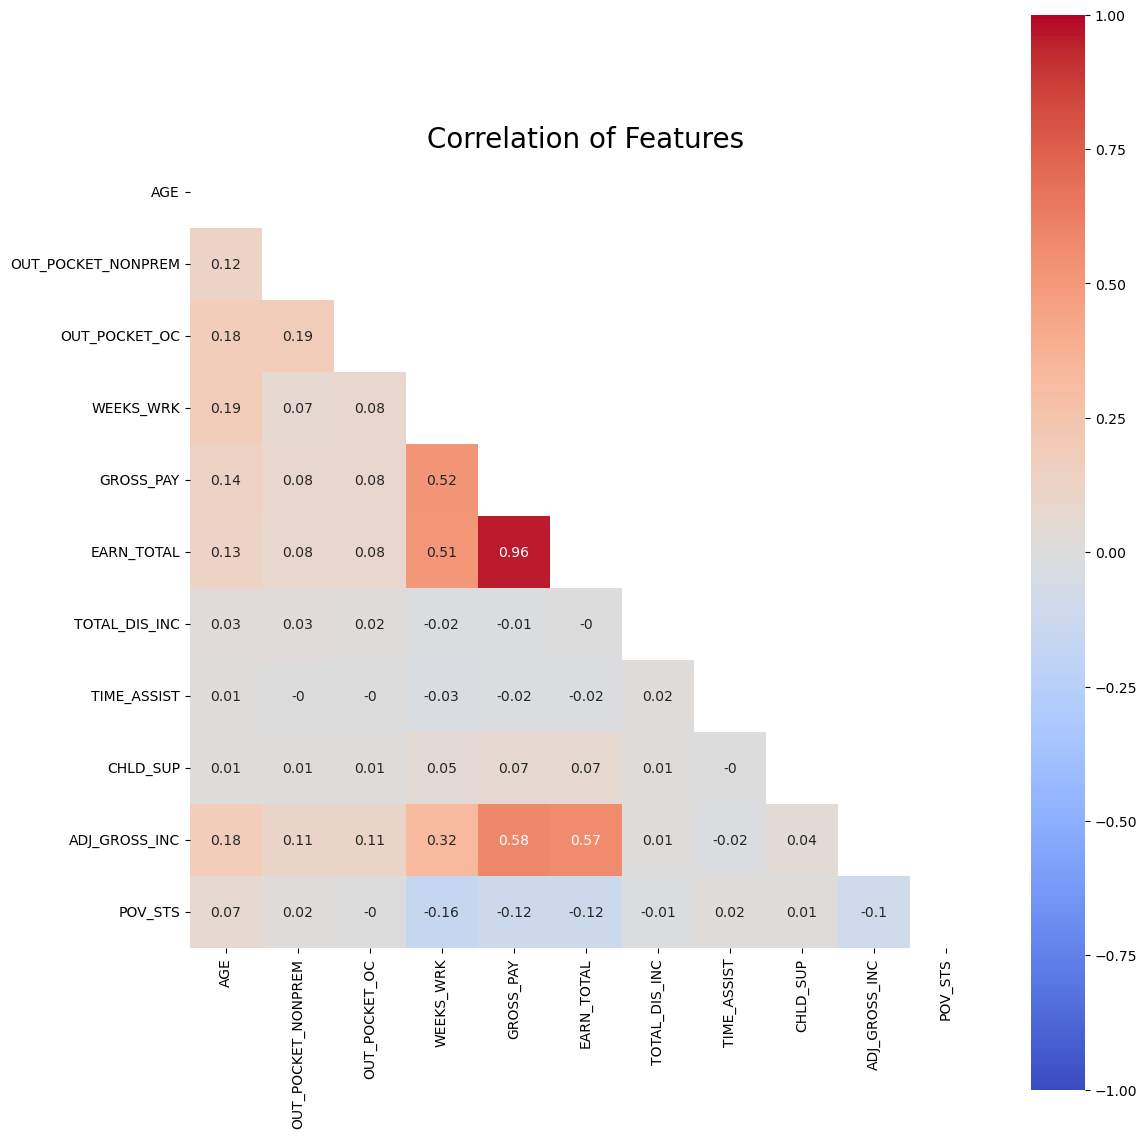

In [7]:
#Plot heatmap presenting correlation of numeric variables
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(12, 12))
plt.title('Correlation of Features', size=20)
corr = round(df[numeric_columns].corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, cmap = 'coolwarm',mask = mask, square = True,vmin=-1,vmax=1)
plt.tight_layout()
plt.savefig("../images/correlation_heatmap");

### Chi Square Analysis

In [15]:
# chi-square test statistically assesses the independence the association between two categorical columns
# https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/8-chi-squared-tests
# https://en.wikipedia.org/wiki/Chi-squared_test

total_categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
target_column = 'POV_STS'

for col in total_categorical_columns:
    contingency_table = pd.crosstab(df[col], df[target_column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test: {col} vs. {target_column}')
    print(f'Chi-square statistic: {chi2}')
    print(f'P-value: {p}')
    print('==' * 25)

Chi-square test: STATE vs. POV_STS
Chi-square statistic: 653.211582988905
P-value: 7.101074488263979e-105
Chi-square test: FAM_RELATIONSHIP vs. POV_STS
Chi-square statistic: 3145.7345429425354
P-value: 0.0
Chi-square test: OCCUPATION vs. POV_STS
Chi-square statistic: 2476.072698288902
P-value: 0.0
Chi-square test: EDU_LVL vs. POV_STS
Chi-square statistic: 2548.5691557376836
P-value: 0.0
Chi-square test: MARITAL vs. POV_STS
Chi-square statistic: 1588.457238922911
P-value: 0.0
Chi-square test: SEX vs. POV_STS
Chi-square statistic: 17.775930101556035
P-value: 2.4850728361130165e-05
Chi-square test: HOUSEHOLD_SUMMARY vs. POV_STS
Chi-square statistic: 1902.2362478752243
P-value: 0.0
Chi-square test: MILITARY vs. POV_STS
Chi-square statistic: 556.9448980434643
P-value: 1.1506732784097677e-121
Chi-square test: CERT_REQ vs. POV_STS
Chi-square statistic: 755.9829846253631
P-value: 6.92437663445168e-165
Chi-square test: TROUB_BATHE vs. POV_STS
Chi-square statistic: 851.4728702052278
P-value: 1.2

### Contingency Tables

In [85]:
for col in total_categorical_columns:
    table = pd.crosstab(df[col], df[target_column])
    print(f'Contingency Table between {col} and {target_column}:')
    display(table)

Contingency Table between STATE and POV_STS:


POV_STS,0,1
STATE,,
Arizona,214,26
Abroad,360,163
Alabama,187,32
Alaska,91,6
Arkansas,284,23
California,1000,133
Colorado,242,17
Connecticut,56,6
Delaware,75,13


Contingency Table between FAM_RELATIONSHIP and POV_STS:


POV_STS,0,1
FAM_RELATIONSHIP,,
child,45358,2385
not fam,22376,3943
other relatives,5470,683
ref person,39683,2711
spouse,28697,1426


Contingency Table between OCCUPATION and POV_STS:


POV_STS,0,1
OCCUPATION,,
Business/Finance,12966,258
Professional,17343,415
Service,11501,935
construction,3841,309
farming,542,57
maintenance,2237,79
military,3,1
none,70295,7954
office,7378,283


Contingency Table between EDU_LVL and POV_STS:


POV_STS,0,1
EDU_LVL,,
associate degree,10673,745
bachelor's degree,23245,1193
children,30196,1417
college no degree,17240,1500
doctorate degree,2206,76
elementary school,1684,484
high school graduate,30127,3373
high school no diploma,11843,1501
master's degree,10267,403


Contingency Table between MARITAL and POV_STS:


POV_STS,0,1
MARITAL,,
divorced,10171,1319
married/civilian spouse,56985,2846
married/estranged,1473,228
married/military spouse,409,6
seperated,1790,291
single,64891,5511
widowed,5865,947


Contingency Table between SEX and POV_STS:


POV_STS,0,1
SEX,,
female,72168,5914
male,69416,5234


Contingency Table between HOUSEHOLD_SUMMARY and POV_STS:


POV_STS,0,1
HOUSEHOLD_SUMMARY,,
child/never married,33051,1405
group living,30,4
householder,53781,5334
non-relative,6519,1188
over 18,10871,873
relative,9643,990
spouse of HH,27585,1351
under 18/ever married,104,3


Contingency Table between MILITARY and POV_STS:


POV_STS,0,1
MILITARY,,
ineligible,35127,1686
no,99235,8945
yes,7222,517


Contingency Table between CERT_REQ and POV_STS:


POV_STS,0,1
CERT_REQ,,
no,2621,107
none,124209,10739
yes,14754,302


Contingency Table between TROUB_BATHE and POV_STS:


POV_STS,0,1
TROUB_BATHE,,
no,108905,9277
not included,30686,1432
yes,1993,439


Contingency Table between TROUB_HEAR and POV_STS:


POV_STS,0,1
TROUB_HEAR,,
no,107081,9204
none,30686,1432
yes,3817,512


Contingency Table between TROUB_SEE and POV_STS:


POV_STS,0,1
TROUB_SEE,,
no,109031,9340
none,30686,1432
yes,1867,376


Contingency Table between TROUB_ALONE and POV_STS:


POV_STS,0,1
TROUB_ALONE,,
no,106737,8835
none,30686,1432
yes,4161,881


Contingency Table between TROUB_WALK and POV_STS:


POV_STS,0,1
TROUB_WALK,,
no,104269,8455
none,30686,1432
yes,6629,1261


Contingency Table between TROUB_CONC and POV_STS:


POV_STS,0,1
TROUB_CONC,,
no,106824,8926
none,30686,1432
yes,4074,790


Contingency Table between HISPANIC and POV_STS:


POV_STS,0,1
HISPANIC,,
no,114059,7973
yes,27525,3175


Contingency Table between IMMIGR_YR and POV_STS:


POV_STS,0,1
IMMIGR_YR,,
1950s,314,61
1960s,779,111
1970s,1478,228
1980s,2769,359
1990s,3928,443
2000s,4920,612
2010s,5403,703
2020s,756,295
before 1950,55,13


Contingency Table between CITIZENSHIP and POV_STS:


POV_STS,0,1
CITIZENSHIP,,
native,123119,8542
non citizen,9232,1605
non native citizen,9233,1001


Contingency Table between DISABLED and POV_STS:


POV_STS,0,1
DISABLED,,
no,98313,7586
not included,30686,1432
yes,12585,2130


Contingency Table between RACE and POV_STS:


POV_STS,0,1
RACE,,
Black-Asian,58,4
White-AI-HP,12,1
AI-Asian,27,1
AI-HP,9,0
American Indian or Alaskan Native only,2208,259
Asian only,9235,904
Asian-HP,145,16
Black only,16306,2135
Black-AI,129,13


Contingency Table between WORK_INDUSTRY and POV_STS:


POV_STS,0,1
WORK_INDUSTRY,,
"Agriculture, forestry, fishing, and hunting",1282,98
"Professional, scientific, management and administrative, and waste management services",8636,394
"Arts, entertainment, recreation and accomodation, and food services",6115,490
Construction,5212,359
"Educational services, and health care and social assistance",16499,551
"Finance and insurance, and real estate and rental and leasing",4795,103
Information,1200,40
Manufacturing,6803,211
Military,3,1


Contingency Table between LABOR_STATUS and POV_STS:


POV_STS,0,1
LABOR_STATUS,,
disabled,4552,1167
employed/absent,2055,130
employed/at work,66408,2621
not applicable,30686,1432
not in labor force/other,16131,2527
retired,19492,2882
unemployed,374,37
unemployed/looking,1886,352


Contingency Table between WRK_STATUS and POV_STS:


POV_STS,0,1
WRK_STATUS,,
Child,30686,1432
FT hours,51550,1562
"FT hours, usually PT for economic reasons",52,5
"FT hours, usually PT for non-economic reasons",254,15
"Not at work, usually FT",1420,68
"Not at work, usually part-time",635,62
Not in labor force,40175,6576
"PT for economic reasons, usually FT",583,51
"PT for non-economic reasons, usually FT",3597,124


Contingency Table between WRK_CLASS_LONGEST and POV_STS:


POV_STS,0,1
WRK_CLASS_LONGEST,,
federal,2656,32
local,4758,83
no pay,34,4
no weeks,68600,8454
private,54920,1985
self employed inc,2633,60
self employed not inc,4100,427
state,3883,103


Contingency Table between LONGEST_IND and POV_STS:


POV_STS,0,1
LONGEST_IND,,
0,30196,1417
Accommodations and food service,4866,341
"Agriculture, forestry, fishing, and hunting",1271,89
"Arts, entertainment, and recreation",1475,73
Construction,5191,302
Durable goods manufacturing,4418,88
Educational services,6726,194
Finance and insurance,3386,46
Health care and social assistance,10090,268


Contingency Table between NO_WRK_RSN and POV_STS:


POV_STS,0,1
NO_WRK_RSN,,
could not find work,727,368
going to school,7951,1084
ill or disabled,5276,1530
not applicable,103180,4111
other,634,332
retired,18108,2727
taking care of home,5708,996


Contingency Table between FT_PT and POV_STS:


POV_STS,0,1
FT_PT,,
ft all year,52077,968
ft part year,8157,619
nonworker,38404,7037
pt all year,6617,413
pt part year,6133,694
under 15,30196,1417


Contingency Table between EARN_SOURCE and POV_STS:


POV_STS,0,1
EARN_SOURCE,,
farm/self employment,317,31
no pay,34,4
self employment,3783,396
unemployed,68600,8454
wage,68850,2263


Contingency Table between ERN_OTR and POV_STS:


POV_STS,0,1
ERN_OTR,,
no,65946,2483
under 15,68600,8454
yes,7038,211


Contingency Table between WORK_DIS and POV_STS:


POV_STS,0,1
WORK_DIS,,
no,102761,8069
under 15,30196,1417
yes,8627,1662


Contingency Table between DIS_INC and POV_STS:


POV_STS,0,1
DIS_INC,,
other or don't know,283,19
US military retirement disability,80,3
US railroad retirement disability,8,0
accident or disability insurance,117,6
company or union disability,212,8
did not receive,140477,11092
federal government disability,72,5
state or local gov't employee disability,181,11
state temporary sickness,16,1


Contingency Table between OTH_DIS_INC and POV_STS:


POV_STS,0,1
OTH_DIS_INC,,
other or don't know,1,0
US military retirement disability,1,0
US railroad retirement disability,1,0
accident or disability insurance,5,0
company or union disability,1,0
did not receive,141571,11148
state or local gov't employee disability,4,0


Contingency Table between FIN_ASSIST and POV_STS:


POV_STS,0,1
FIN_ASSIST,,
no,110629,9444
under 15,30196,1417
yes,759,287


Contingency Table between OTH_INC and POV_STS:


POV_STS,0,1
OTH_INC,,
afdc,25,1
alimony,69,4
annuities or paid up insurance policies,9,1
anything else,1028,54
dividends,1,0
estates or trusts,1,0
interest,1,0
no other source,140400,11086
other public assistance,14,0


Contingency Table between CASH_ASSIST and POV_STS:


POV_STS,0,1
CASH_ASSIST,,
TANF/AFDC,386,78
both,29,2
other,224,36
under 15,140945,11032


Contingency Table between WIC and POV_STS:


POV_STS,0,1
WIC,,
no,35495,2428
not eligible,104885,8617
yes,1204,103


Contingency Table between TAX_FILE_STAT and POV_STS:


POV_STS,0,1
TAX_FILE_STAT,,
head of HH,7468,804
joint 1p over 65 y/o,4464,364
joint both ov 65 y/o,10692,844
joint under 65 y/o,42218,1478
nonfiler,39055,2989
single,37687,4669


Contingency Table between HEALTH_INS and POV_STS:


POV_STS,0,1
HEALTH_INS,,
infant,256,15
no,10238,2003
yes,131090,9130


Contingency Table between PUB_INS and POV_STS:


POV_STS,0,1
PUB_INS,,
covered all year,45811,6289
infant,256,15
no coverage,93485,4613
some coverage,2032,231


Contingency Table between PRIV_INS and POV_STS:


POV_STS,0,1
PRIV_INS,,
covered all year,92588,3266
infant,256,15
no coverage,44256,7554
some coverage,4484,313


Contingency Table between POV_LVL and POV_STS:


POV_STS,0,1
POV_LVL,,
100-124 percent of poverty level,4949,873
125-149 percent of poverty level,5796,595
150+ percent of poverty level,121472,915
below poverty level,9098,8738
not in poverty,269,27


## Data Visualization<a id='dv'></a>
---

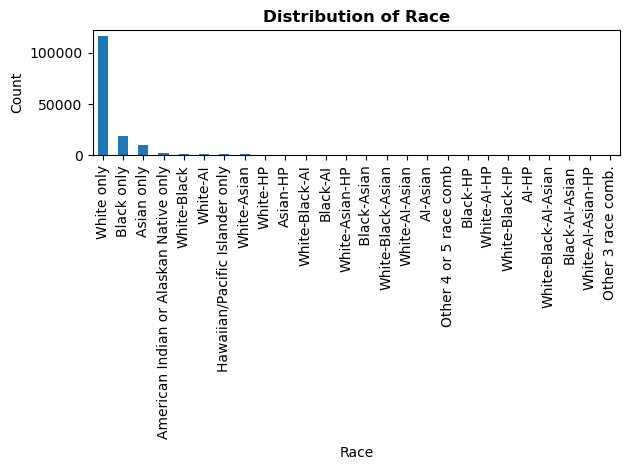

In [8]:
custom_bar_plot('RACE','Race')

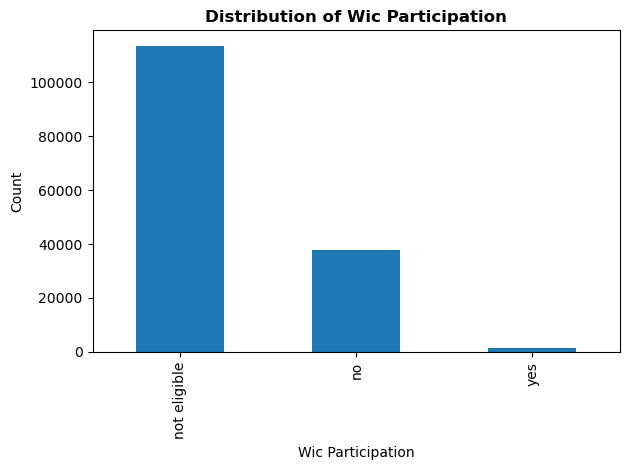

In [9]:
custom_bar_plot('WIC','Wic Participation')

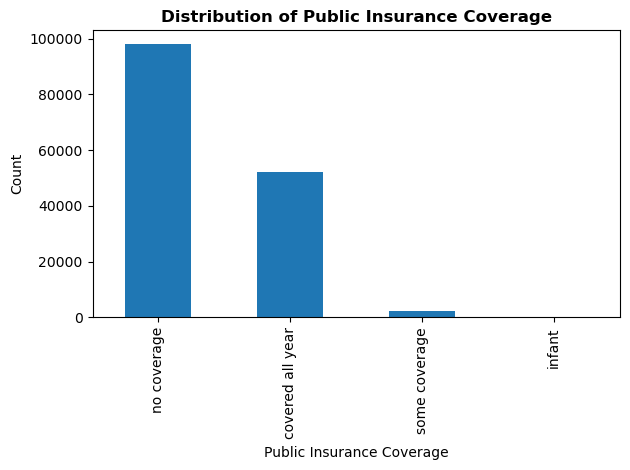

In [10]:
custom_bar_plot('PUB_INS','Public Insurance Coverage')

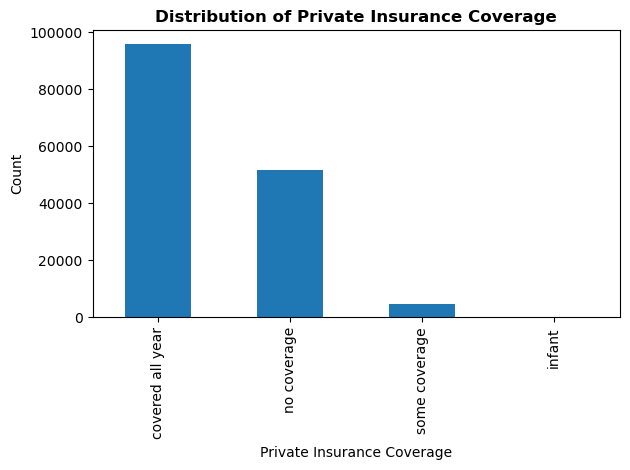

In [11]:
custom_bar_plot('PRIV_INS','Private Insurance Coverage')

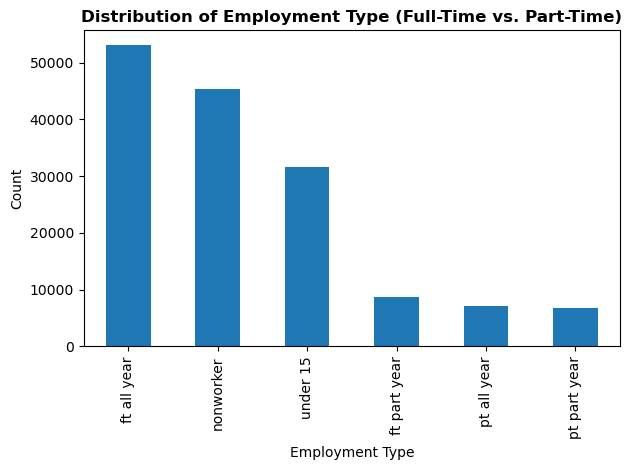

In [12]:
custom_bar_plot('FT_PT','Employment Type','Employment Type (Full-Time vs. Part-Time)')

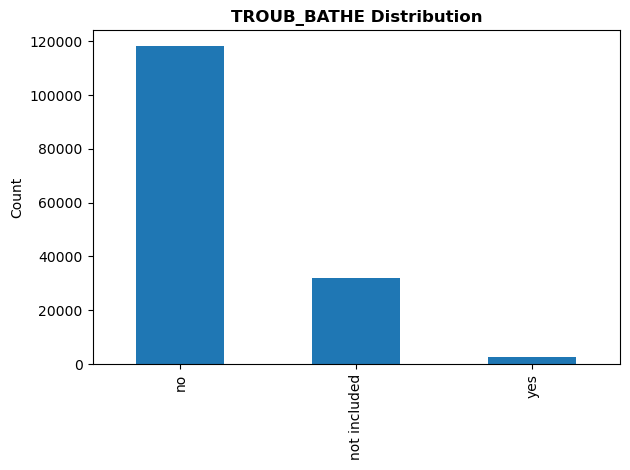

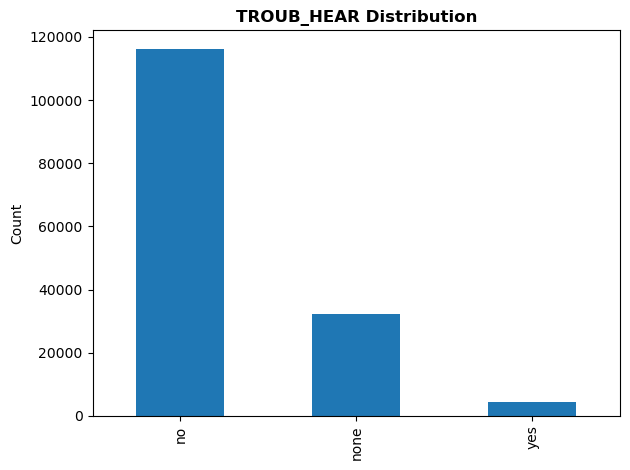

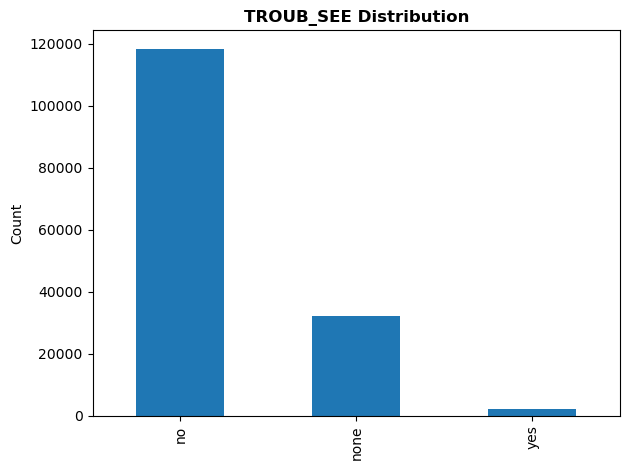

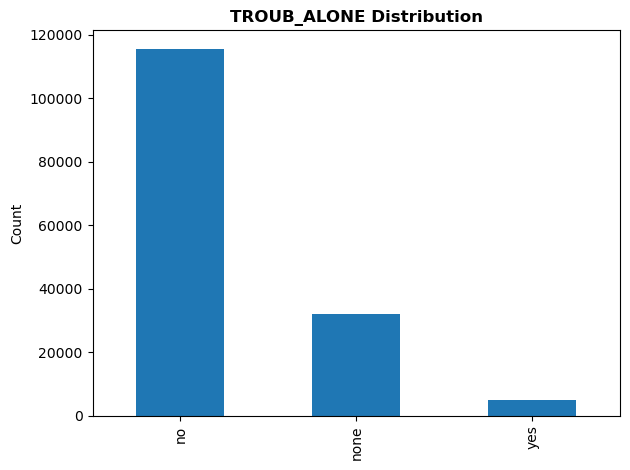

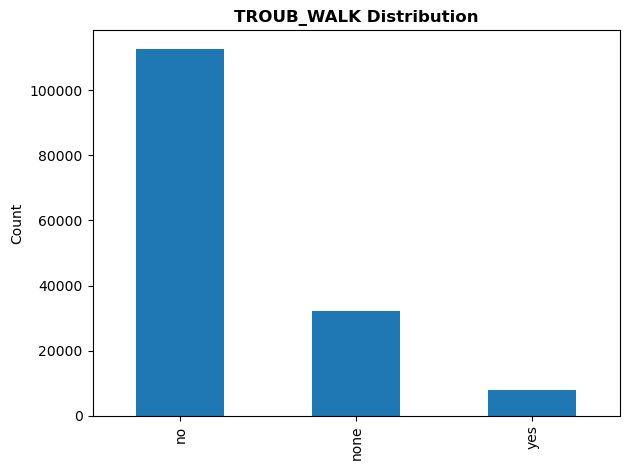

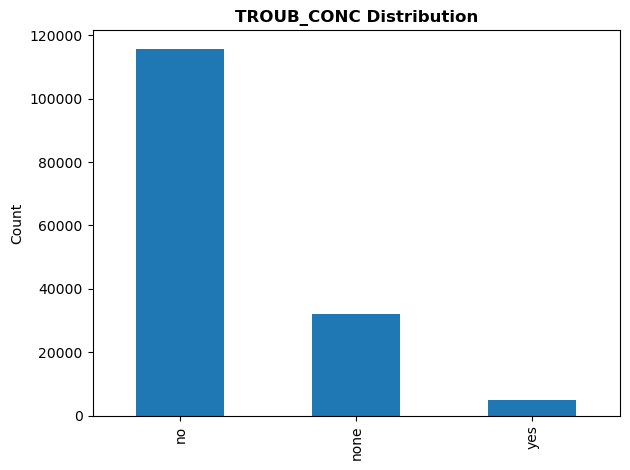

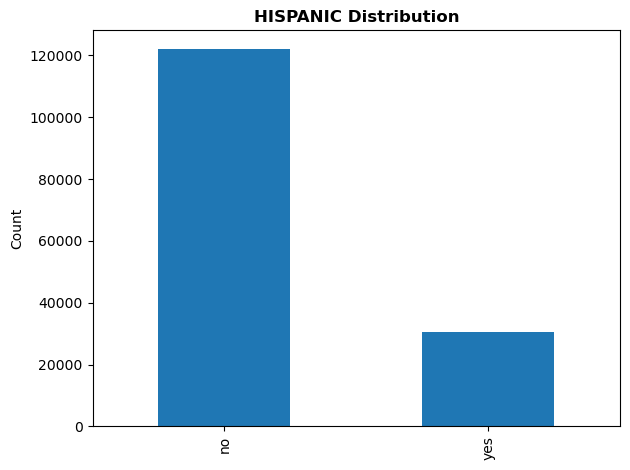

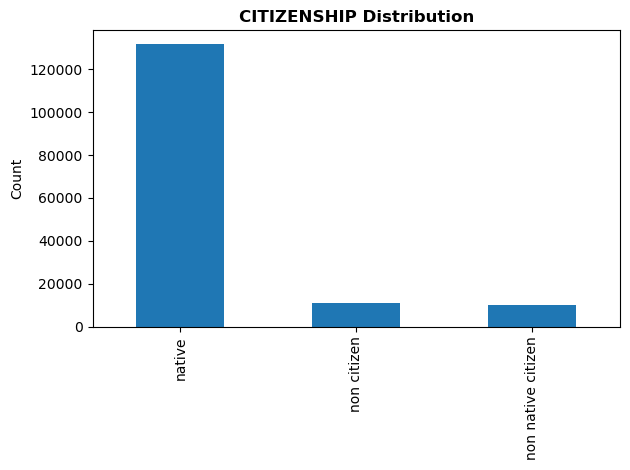

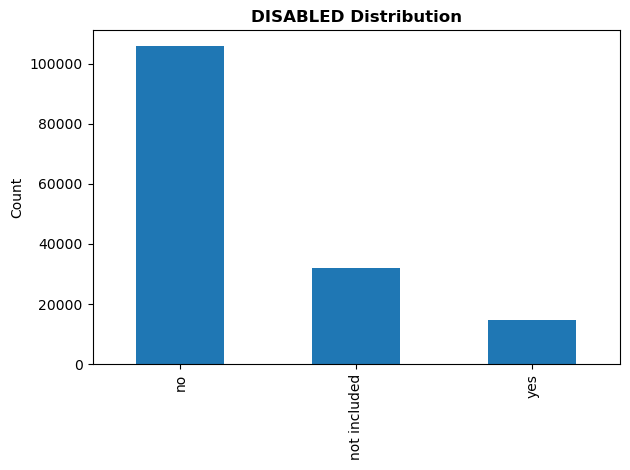

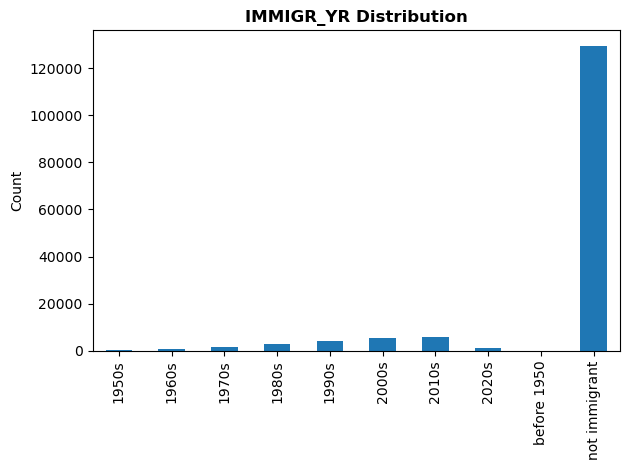

In [13]:
categorical_columns = ['TROUB_BATHE', 'TROUB_HEAR', 'TROUB_SEE', 
                       'TROUB_ALONE', 'TROUB_WALK', 'TROUB_CONC', 
                       'HISPANIC', 'CITIZENSHIP', 'DISABLED', 
                       'IMMIGR_YR']

for col in categorical_columns:
    if col != 'IMMIGR_YR':
        df[col].value_counts().plot(kind = 'bar')
    else:
        df[col].value_counts().sort_index().plot(kind = 'bar')
    plt.title(f'{col} Distribution',fontweight='bold')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f'../images/{col}_distribution.png')
    plt.show()
    print('\n'*2);

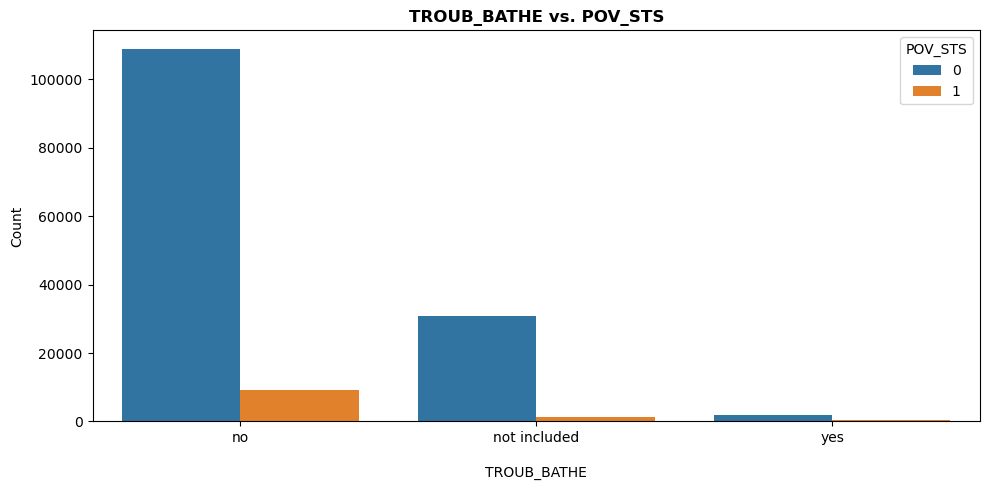

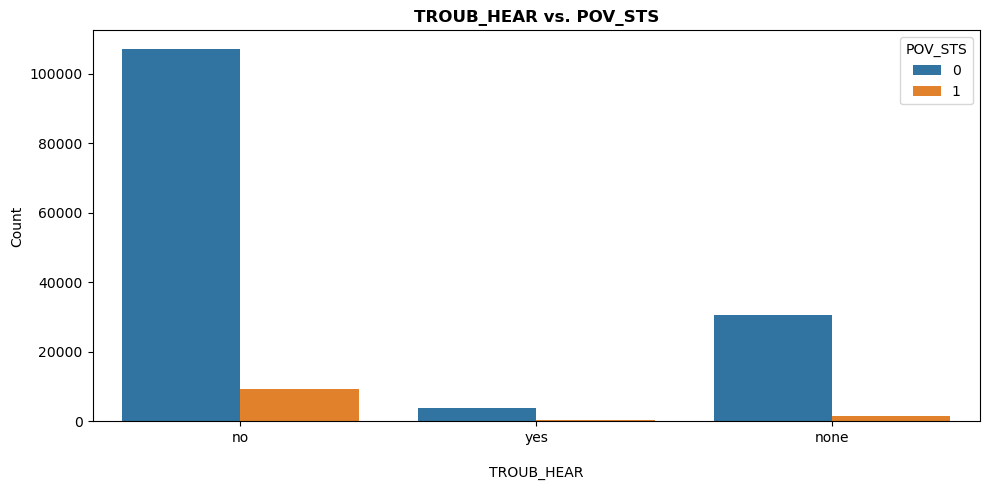

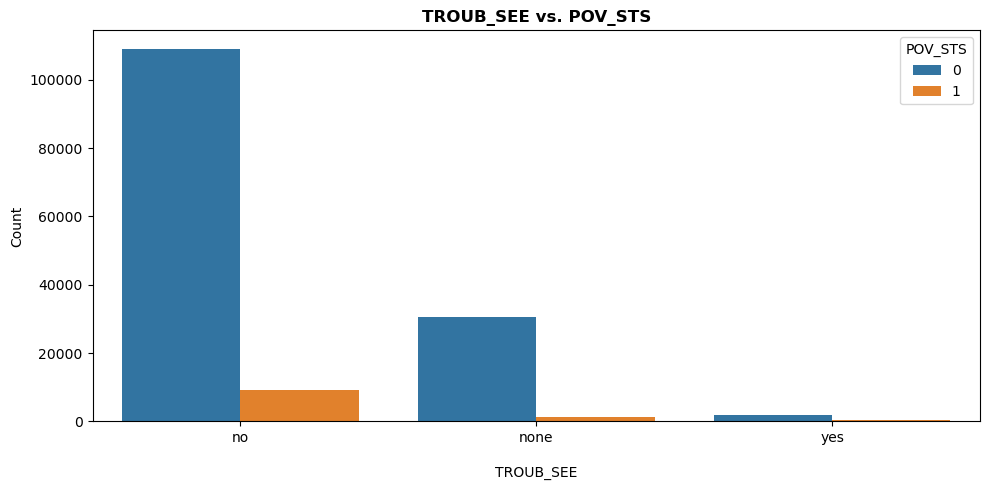

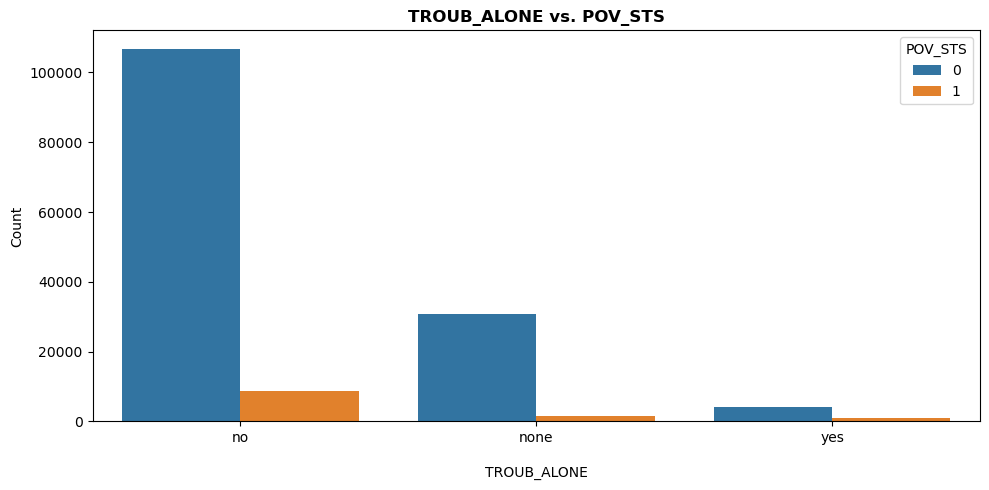

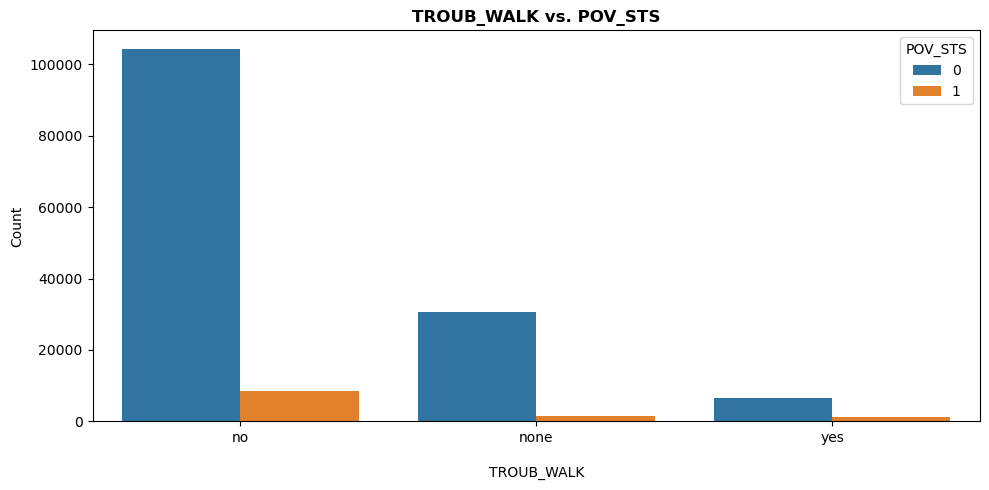

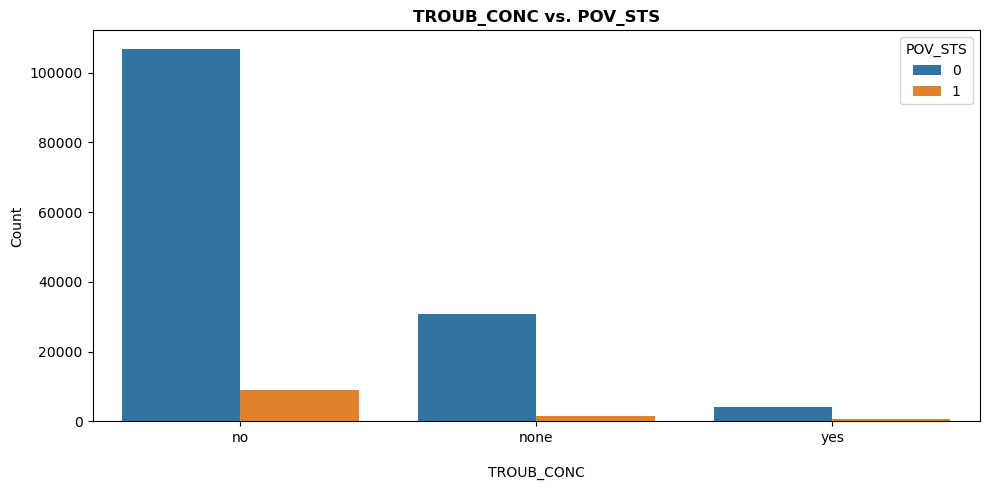

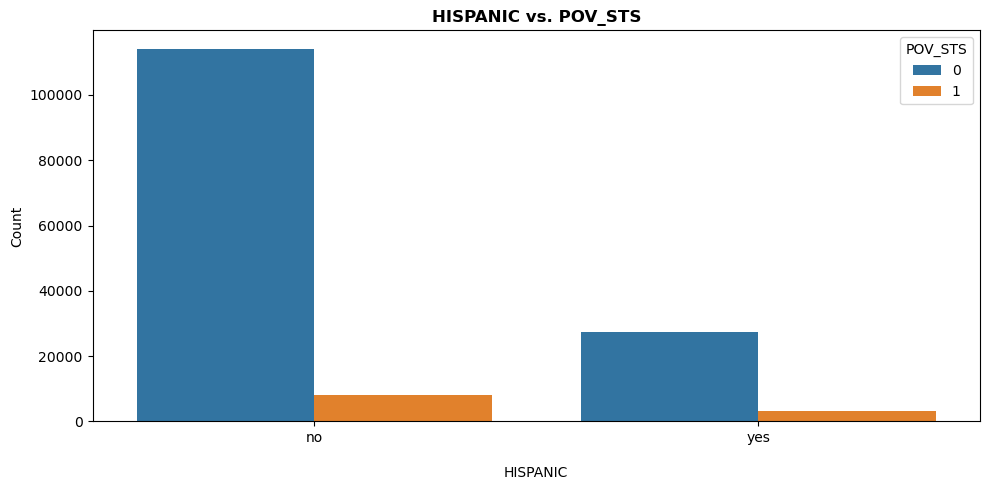

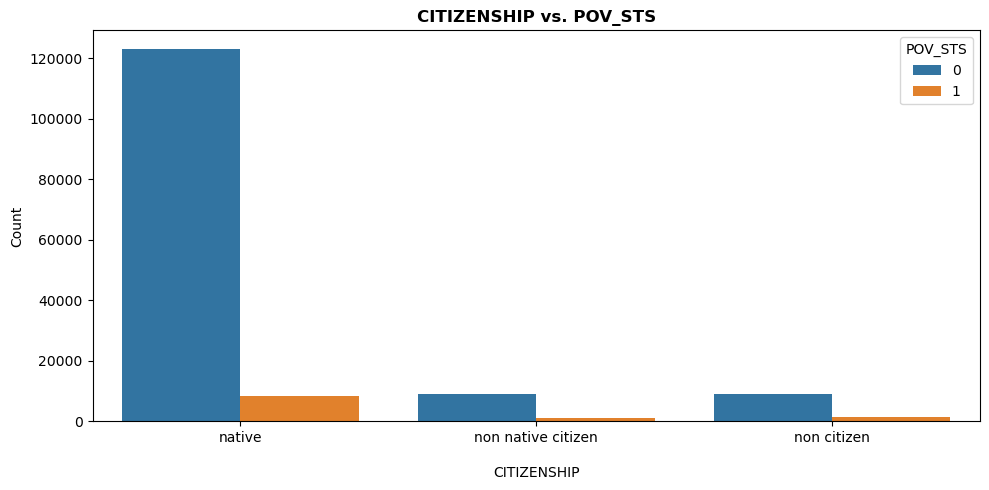

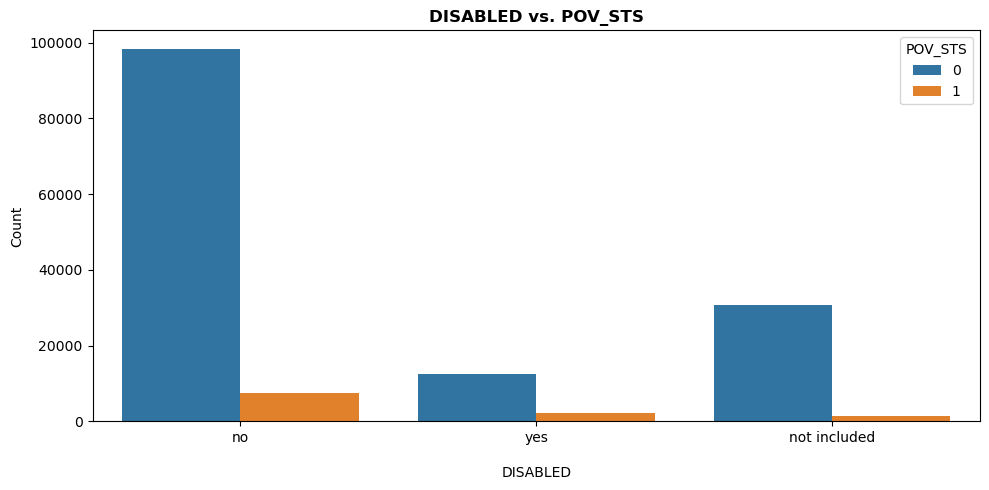

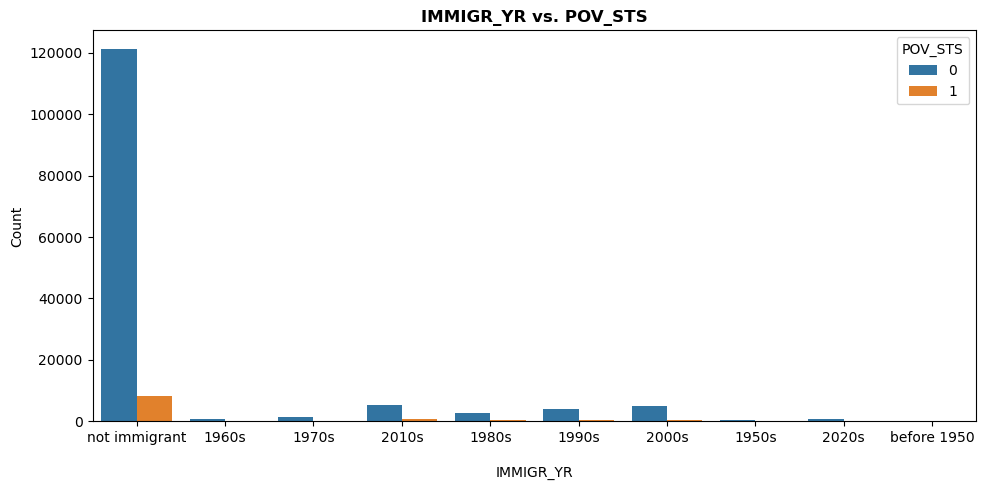

In [16]:
for col in categorical_columns:
    plt.figure(figsize = (10, 5))
    sns.countplot(x = col, hue = target_column, data = df)
    plt.title(f'{col} vs. {target_column}', fontweight = 'bold')
    plt.xlabel(col,labelpad = 15)
    plt.ylabel('Count')
    plt.legend(title = target_column)
    plt.tight_layout()
    plt.savefig(f'../images/{col}_vs_{target_column}.png')
    plt.show()

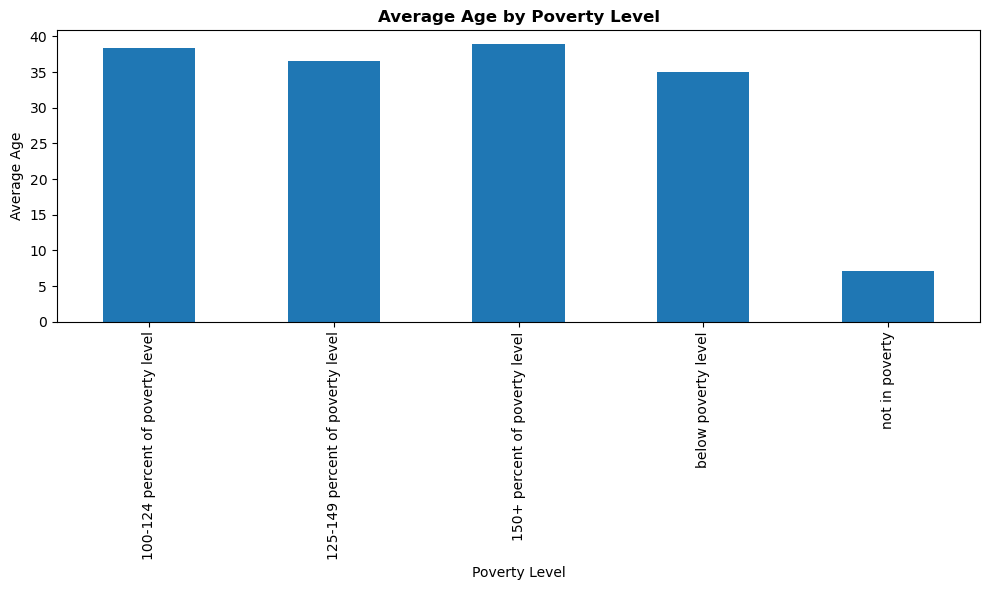

In [17]:
custom_bar_plot2(df.groupby('POV_LVL')['AGE'].mean(), 'Poverty Level', 'Average Age','Average Age by Poverty Level')

<Figure size 1000x600 with 0 Axes>

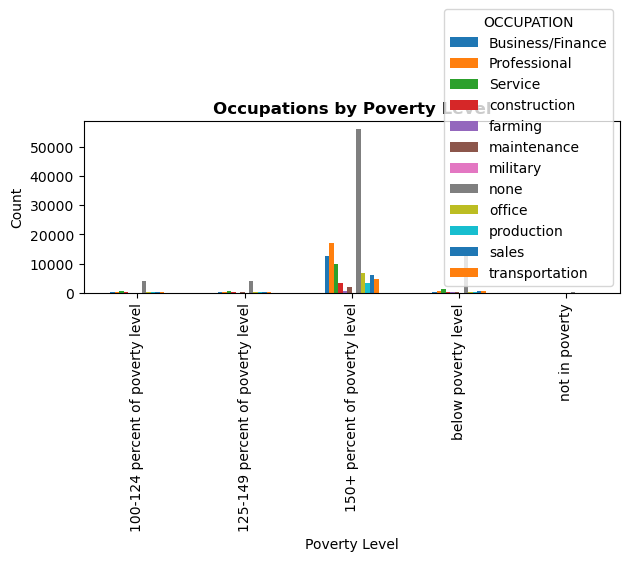

In [18]:
custom_bar_plot2(df.groupby(['POV_LVL', 'OCCUPATION']).size().unstack(), 'Poverty Level', 'Count',
                 'Occupations by Poverty Level')

In [19]:
df['STATE'].value_counts()

nonmover                141272
California                1133
Texas                      842
Florida                    610
Abroad                     523
Illinois                   355
Washington                 329
Arkansas                   307
New York                   300
Georgia                    275
Colorado                   259
North Carolina             258
Utah                       256
 Arizona                   240
Pennsylvania               238
Massachusetts              236
Michigan                   232
Alabama                    219
Louisiana                  213
Ohio                       211
Idaho                      207
Virginia                   203
Tennessee                  199
Oklahoma                   189
Indiana                    186
South Carolina             182
Minnesota                  169
Oregon                     165
Kansas                     164
Missouri                   161
Mississippi                159
Wyoming                    156
New Jers

<Figure size 1000x600 with 0 Axes>

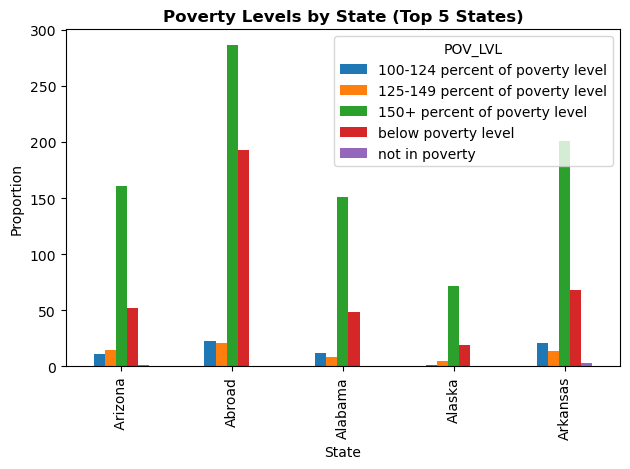

In [20]:
custom_bar_plot2(df.groupby(['STATE', 'POV_LVL']).size().unstack().head(),
         'State', 'Proportion', 'Poverty Levels by State (Top 5 States)')

<Figure size 1000x600 with 0 Axes>

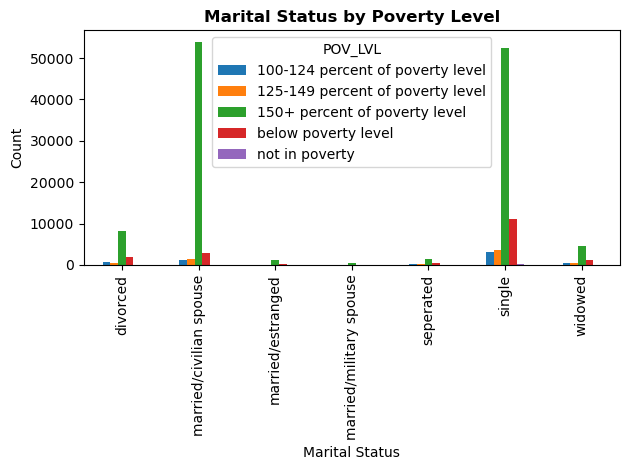

In [21]:
custom_bar_plot2(df.groupby(['MARITAL', 'POV_LVL']).size().unstack(),'Marital Status',
                 'Count', 'Marital Status by Poverty Level')

<Figure size 1000x600 with 0 Axes>

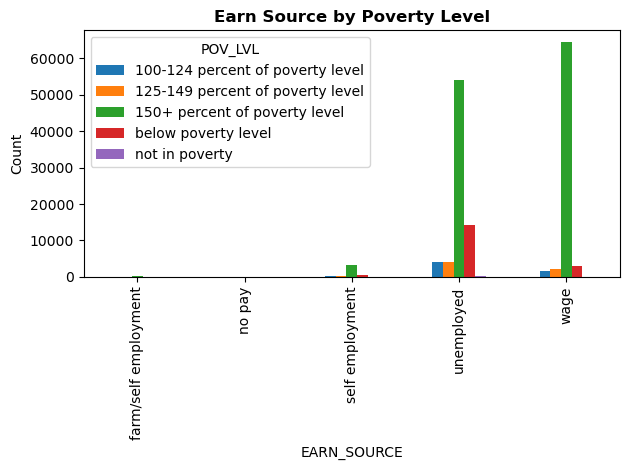

In [22]:
custom_bar_plot2(df.groupby(['EARN_SOURCE', 'POV_LVL']).size().unstack(),'EARN_SOURCE',
                 'Count', 'Earn Source by Poverty Level')

<Figure size 1000x600 with 0 Axes>

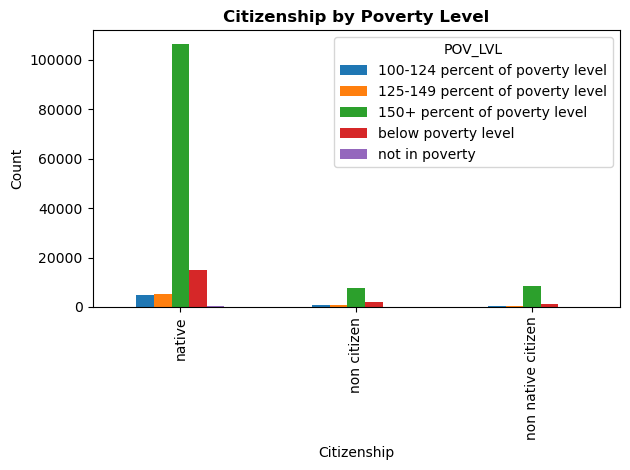

In [23]:
custom_bar_plot2(df.groupby(['CITIZENSHIP', 'POV_LVL']).size().unstack(),'Citizenship',
                 'Count', 'Citizenship by Poverty Level')

<Figure size 1000x600 with 0 Axes>

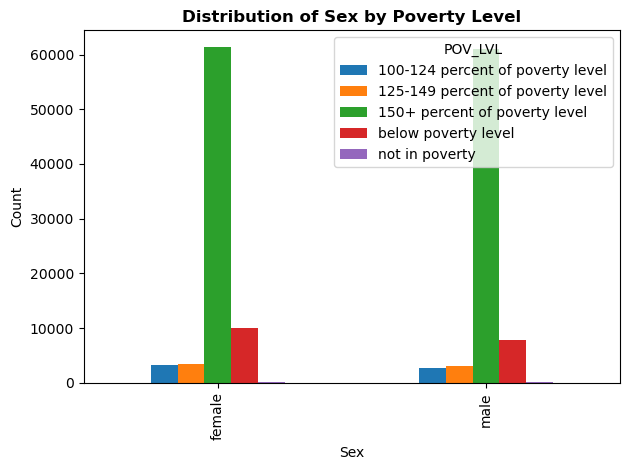

In [24]:
custom_bar_plot2(df.groupby(['SEX', 'POV_LVL']).size().unstack(),
         'Sex', 'Count', 'Distribution of Sex by Poverty Level')

<Figure size 1000x600 with 0 Axes>

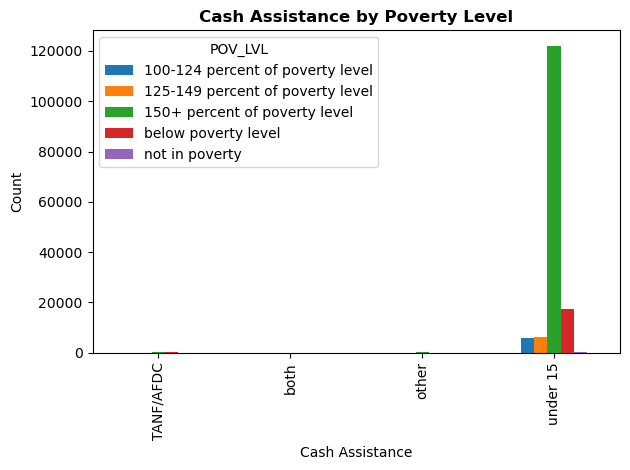

In [25]:
custom_bar_plot2(df.groupby(['CASH_ASSIST', 'POV_LVL']).size().unstack(),
         'Cash Assistance', 'Count', 'Cash Assistance by Poverty Level')

<Figure size 1000x600 with 0 Axes>

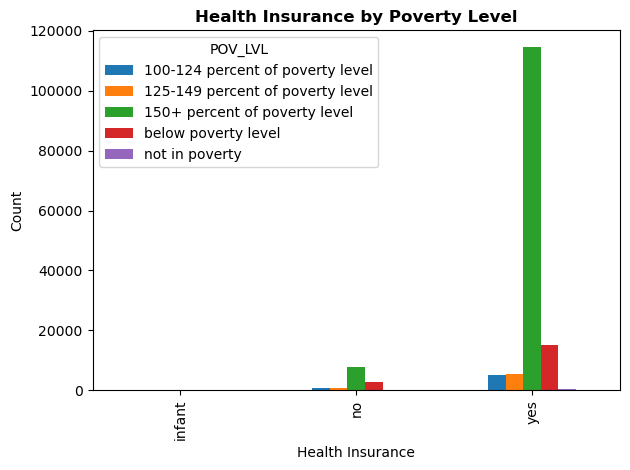

In [26]:
custom_bar_plot2(df.groupby(['HEALTH_INS', 'POV_LVL']).size().unstack(),
         'Health Insurance', 'Count', 'Health Insurance by Poverty Level')

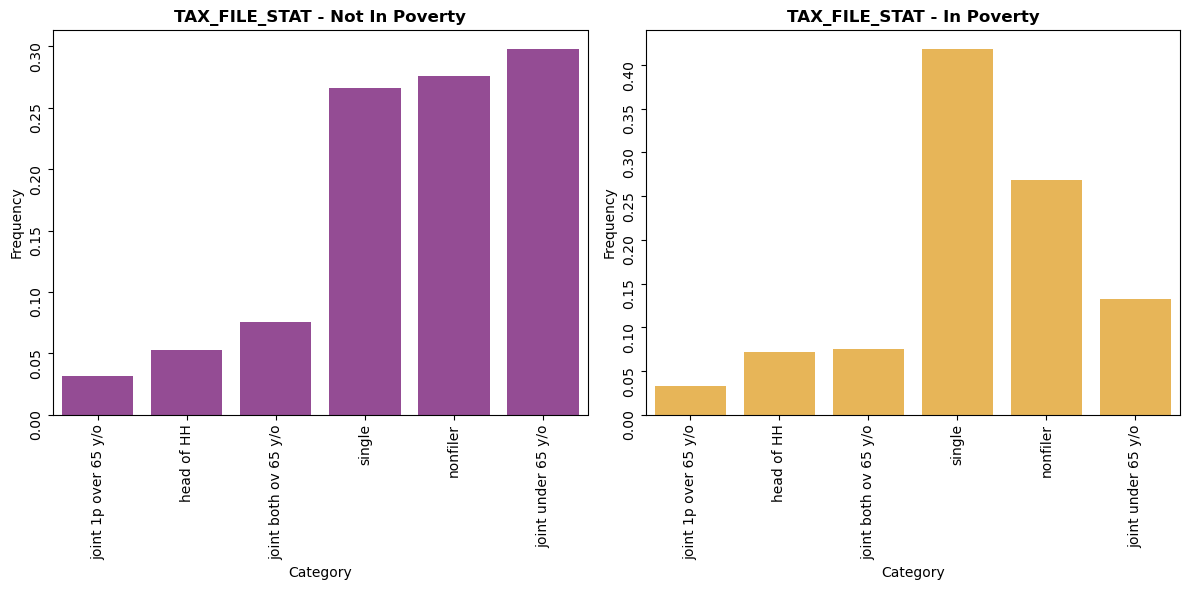

In [27]:
custom_frequency_plot("TAX_FILE_STAT", 'purple')

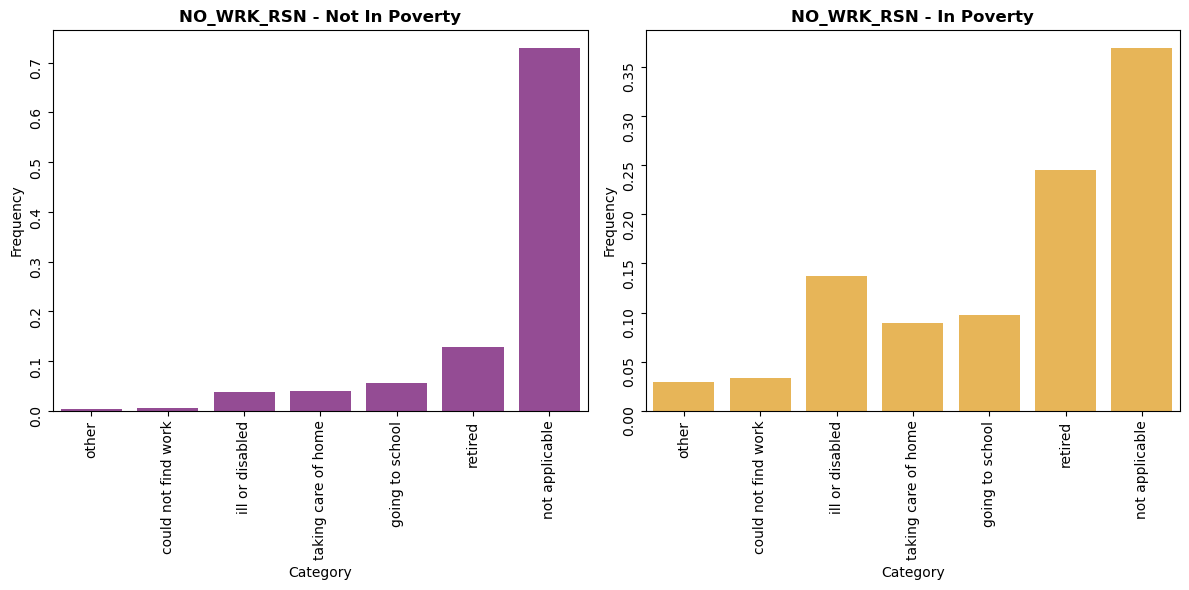

In [28]:
custom_frequency_plot("NO_WRK_RSN", 'purple')

/var/folders/q0/qm987d6d2pn_n2yskb774s140000gn/T/ipykernel_24306/2695938402.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


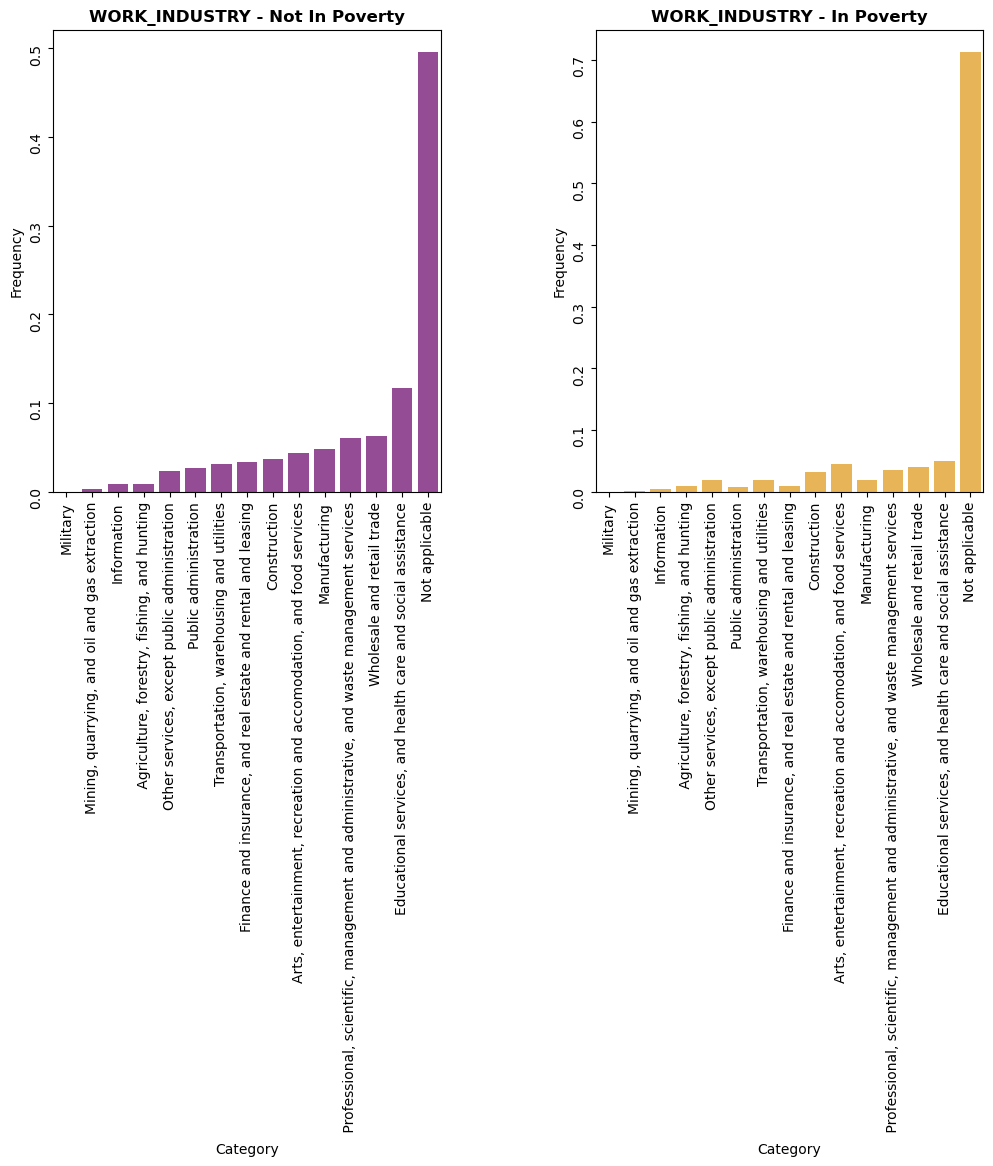

In [29]:
custom_frequency_plot("WORK_INDUSTRY", 'purple')

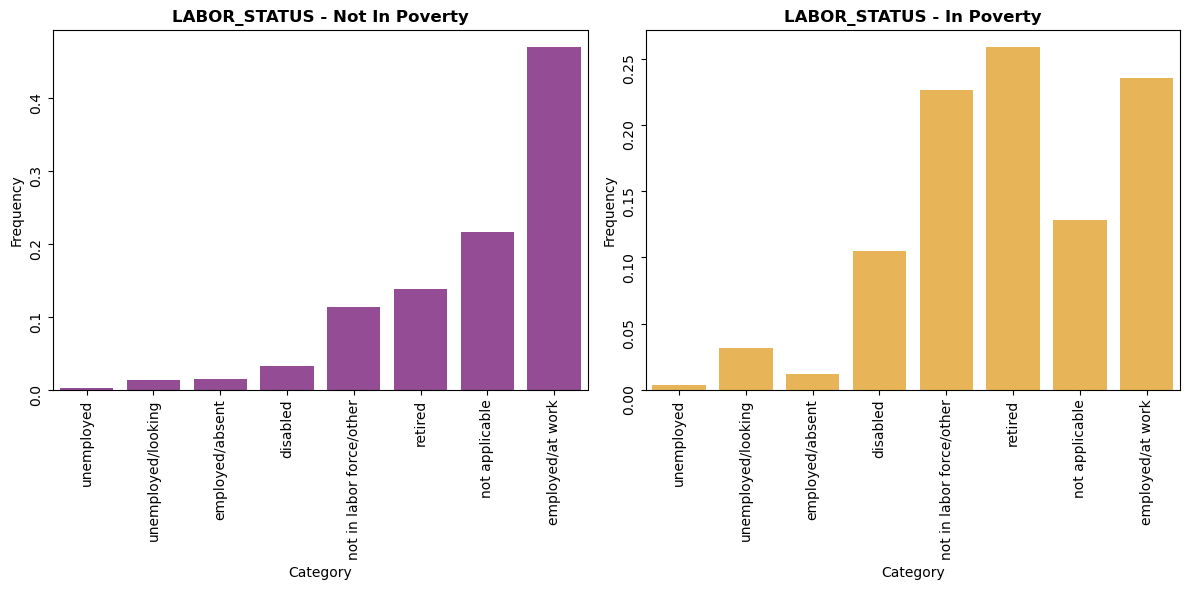

In [30]:
custom_frequency_plot("LABOR_STATUS", 'purple')

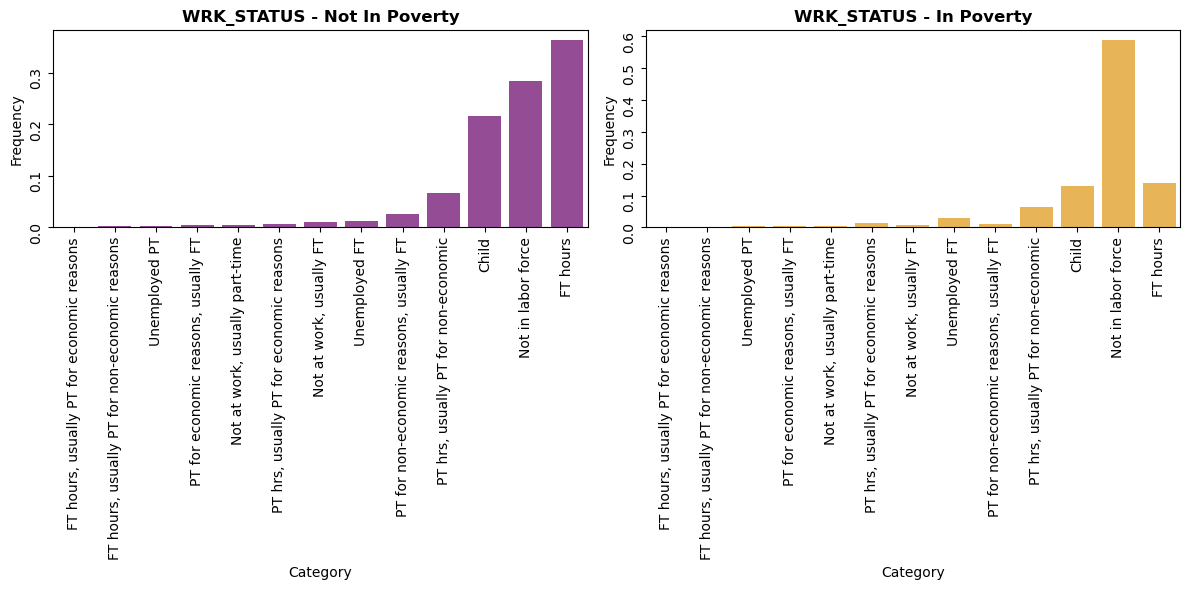

In [31]:
custom_frequency_plot('WRK_STATUS', "purple")

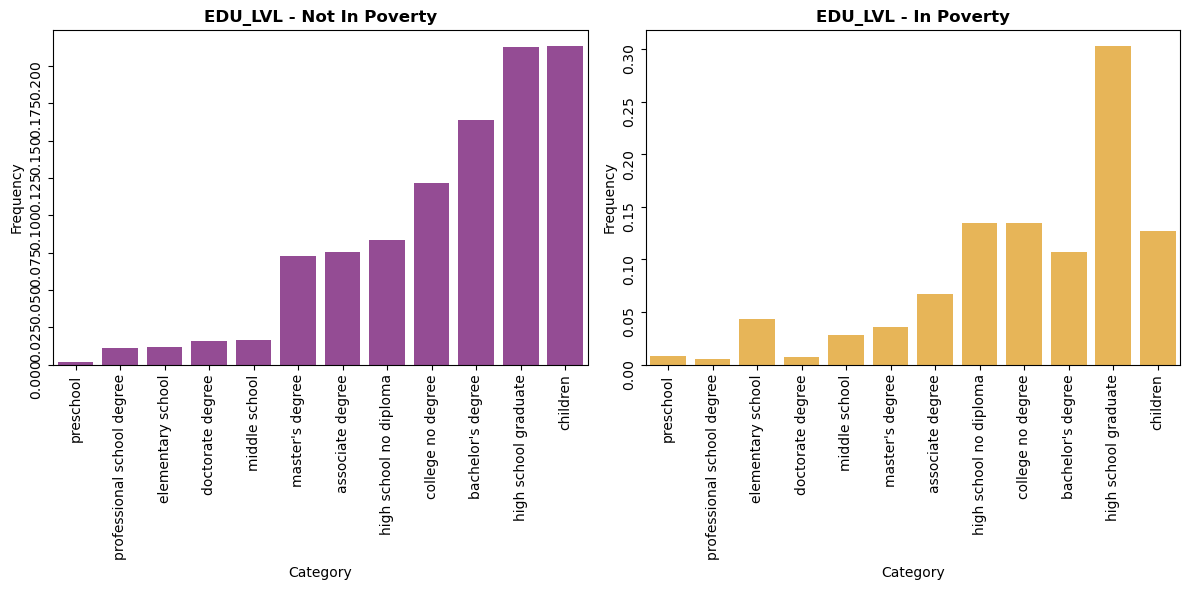

In [32]:
custom_frequency_plot("EDU_LVL", "purple")

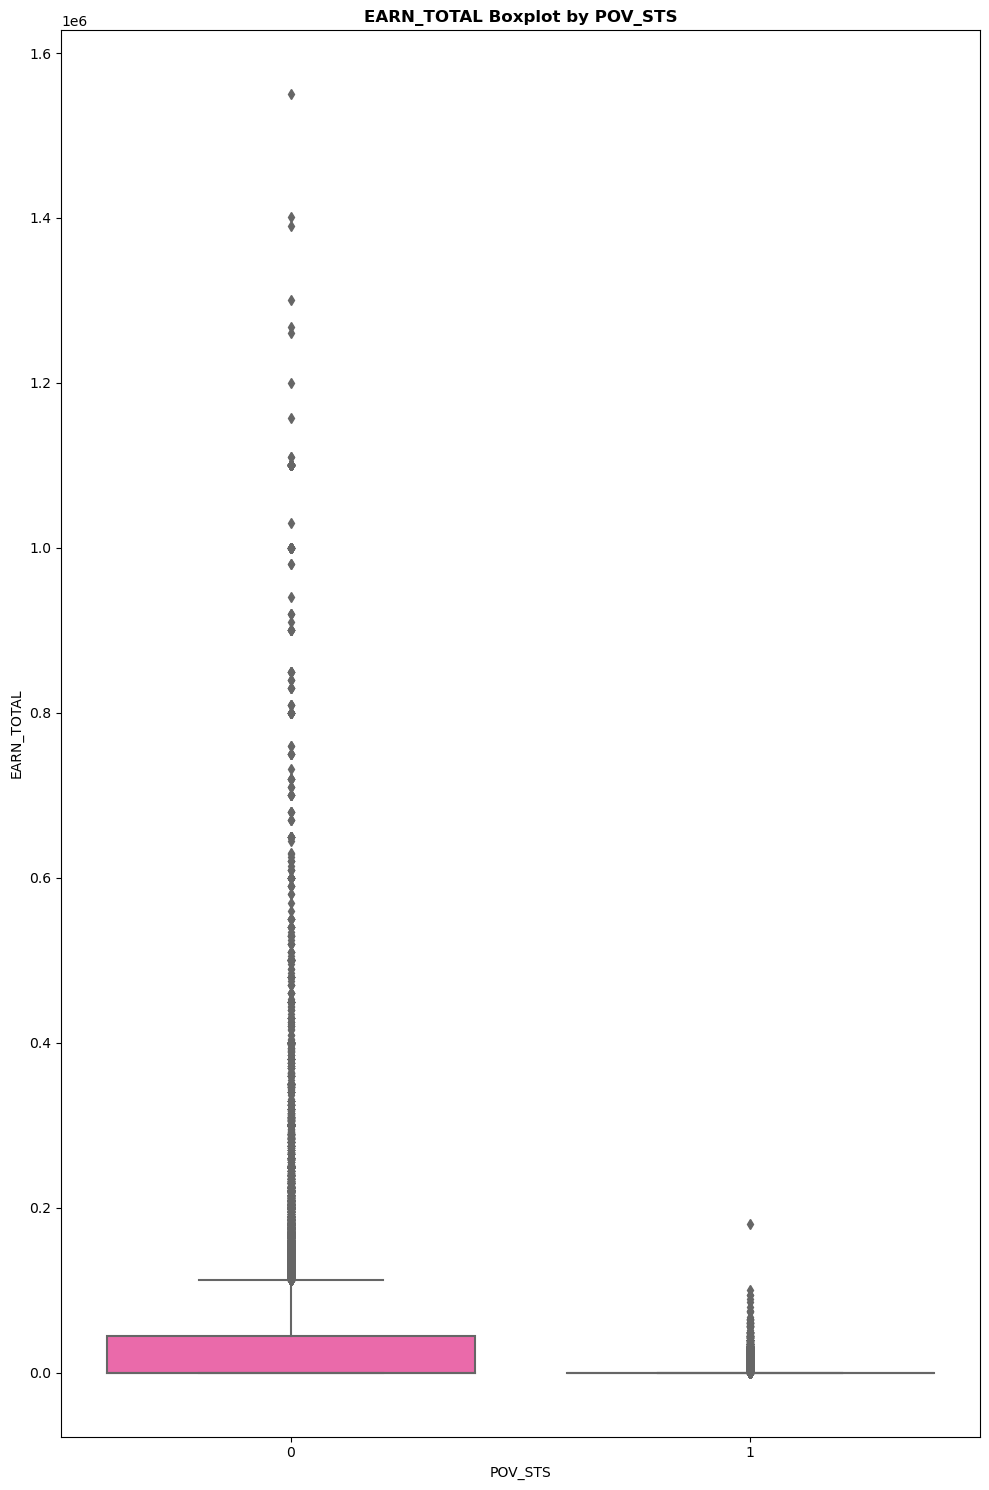

In [33]:
plt.figure(figsize=(10,15))
sns.boxplot(x = "POV_STS",y = "EARN_TOTAL",data = df, palette = "spring")
plt.title("EARN_TOTAL Boxplot by POV_STS", fontweight = 'bold')
plt.tight_layout()
plt.savefig('../images/EARN_TOTAL_by_POV_STS_boxplot.png');

### Exploratory Data Analysis Conclusions